# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [1]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [8]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [10]:
client = MongoClient(mongod_connect)
db = client.gp22 # use or create a database named demo
tweet_collection = db.lab9 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [11]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [12]:
track = ['covid19'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [13]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1325970907618275329
1325970907760766978
1325970908465549315
1325970908549443590
1325970910428360705
1325970911258836992
1325970913414819841
1325970913414832133
1325970915050414080
1325970915448983553
1325970917688631297
1325970918632513536
1325970918649323522
1325970919207088128
1325970919664312322
1325970919928553472
1325970920826134530
1325970921555849216
1325970922940084224
1325970923590201345
1325970924525350912
1325970924475047936
1325970925448126464
1325970927058898945
1325970926698164224
1325970926530306050
1325970929411874822
1325970929772605442
1325970929898360832
1325970929990717441
1325970930959589376
1325970931907358725
1325970932423331840
1325970934184906755
1325970934466023427
1325970934969339909
1325970935623675905
1325970936210857984
1325970936743538689
1325970938635182081
1325970939004280832
1325970939356487686
1325970940027658240
1325970941625724929
1325970942221234188
1325970942141616128
1325970942091145216
1325970942556856320
1325970942556844032
1325970943345299458


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [14]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [15]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [16]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Tue Nov 10 01:21:27 +0000 2020'
'Tue Nov 10 01:21:27 +0000 2020'
'Tue Nov 10 01:21:26 +0000 2020'
'Tue Nov 10 01:21:26 +0000 2020'
'Tue Nov 10 01:21:26 +0000 2020'
'Tue Nov 10 01:21:25 +0000 2020'
'Tue Nov 10 01:21:25 +0000 2020'
'Tue Nov 10 01:21:25 +0000 2020'
'Tue Nov 10 01:21:25 +0000 2020'
'Tue Nov 10 01:21:25 +0000 2020'
'Tue Nov 10 01:21:24 +0000 2020'
'Tue Nov 10 01:21:24 +0000 2020'
'Tue Nov 10 01:21:24 +0000 2020'
'Tue Nov 10 01:21:24 +0000 2020'
'Tue Nov 10 01:21:24 +0000 2020'
'Tue Nov 10 01:21:23 +0000 2020'
'Tue Nov 10 01:21:23 +0000 2020'
'Tue Nov 10 01:21:23 +0000 2020'
'Tue Nov 10 01:21:23 +0000 2020'
'Tue Nov 10 01:21:22 +0000 2020'
'Tue Nov 10 01:21:22 +0000 2020'
'Tue Nov 10 01:21:21 +0000 2020'
'Tue Nov 10 01:21:21 +0000 2020'
'Tue Nov 10 01:21:21 +0000 2020'
'Tue Nov 10 01:21:21 +0000 2020'
'Tue Nov 10 01:21:21 +0000 2020'
'Tue Nov 10 01:21:20 +0000 2020'
'Tue Nov 10 01:21:20 +0000 2020'
'Tue Nov 10 01:21:20 +0000 2020'
'Tue Nov 10 01:21:20 +0000 2020'
'Tue Nov 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [17]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Tue Nov 10 01:20:54 +0000 2020'
'Tue Nov 10 01:20:54 +0000 2020'
'Tue Nov 10 01:20:53 +0000 2020'
'Tue Nov 10 01:20:53 +0000 2020'
'Tue Nov 10 01:20:53 +0000 2020'
'Tue Nov 10 01:20:52 +0000 2020'
'Tue Nov 10 01:20:52 +0000 2020'
'Tue Nov 10 01:20:52 +0000 2020'
'Tue Nov 10 01:20:52 +0000 2020'
'Tue Nov 10 01:20:52 +0000 2020'
'Tue Nov 10 01:20:52 +0000 2020'
'Tue Nov 10 01:20:50 +0000 2020'
'Tue Nov 10 01:20:50 +0000 2020'
'Tue Nov 10 01:20:50 +0000 2020'
'Tue Nov 10 01:20:49 +0000 2020'
'Tue Nov 10 01:20:49 +0000 2020'
'Tue Nov 10 01:20:49 +0000 2020'
'Tue Nov 10 01:20:48 +0000 2020'
'Tue Nov 10 01:20:48 +0000 2020'
'Tue Nov 10 01:20:47 +0000 2020'
'Tue Nov 10 01:20:47 +0000 2020'
'Tue Nov 10 01:20:47 +0000 2020'
'Tue Nov 10 01:20:47 +0000 2020'
'Tue Nov 10 01:20:47 +0000 2020'
'Tue Nov 10 01:20:47 +0000 2020'
'Tue Nov 10 01:20:47 +0000 2020'
'Tue Nov 10 01:20:47 +0000 2020'
'Tue Nov 10 01:20:46 +0000 2020'
'Tue Nov 10 01:20:46 +0000 2020'
'Tue Nov 10 01:20:45 +0000 2020'
'Tue Nov 1

'Tue Nov 10 01:19:30 +0000 2020'
'Tue Nov 10 01:19:30 +0000 2020'
'Tue Nov 10 01:19:30 +0000 2020'
'Tue Nov 10 01:19:30 +0000 2020'
'Tue Nov 10 01:19:29 +0000 2020'
'Tue Nov 10 01:19:29 +0000 2020'
'Tue Nov 10 01:19:29 +0000 2020'
'Tue Nov 10 01:19:28 +0000 2020'
'Tue Nov 10 01:19:28 +0000 2020'
'Tue Nov 10 01:19:27 +0000 2020'
'Tue Nov 10 01:19:27 +0000 2020'
'Tue Nov 10 01:19:27 +0000 2020'
'Tue Nov 10 01:19:26 +0000 2020'
'Tue Nov 10 01:19:26 +0000 2020'
'Tue Nov 10 01:19:26 +0000 2020'
'Tue Nov 10 01:19:25 +0000 2020'
'Tue Nov 10 01:19:25 +0000 2020'
'Tue Nov 10 01:19:25 +0000 2020'
'Tue Nov 10 01:19:25 +0000 2020'
'Tue Nov 10 01:19:24 +0000 2020'
'Tue Nov 10 01:19:24 +0000 2020'
'Tue Nov 10 01:19:24 +0000 2020'
'Tue Nov 10 01:19:24 +0000 2020'
'Tue Nov 10 01:19:23 +0000 2020'
'Tue Nov 10 01:19:23 +0000 2020'
'Tue Nov 10 01:19:23 +0000 2020'
'Tue Nov 10 01:19:23 +0000 2020'
'Tue Nov 10 01:19:22 +0000 2020'
'Tue Nov 10 01:19:22 +0000 2020'
'Tue Nov 10 01:19:22 +0000 2020'
'Tue Nov 1

'Tue Nov 10 01:17:16 +0000 2020'
'Tue Nov 10 01:17:16 +0000 2020'
'Tue Nov 10 01:17:15 +0000 2020'
'Tue Nov 10 01:17:15 +0000 2020'
'Tue Nov 10 01:17:15 +0000 2020'
'Tue Nov 10 01:17:14 +0000 2020'
'Tue Nov 10 01:17:14 +0000 2020'
'Tue Nov 10 01:17:14 +0000 2020'
'Tue Nov 10 01:17:14 +0000 2020'
'Tue Nov 10 01:17:14 +0000 2020'
'Tue Nov 10 01:17:13 +0000 2020'
'Tue Nov 10 01:17:13 +0000 2020'
'Tue Nov 10 01:17:12 +0000 2020'
'Tue Nov 10 01:17:12 +0000 2020'
'Tue Nov 10 01:17:12 +0000 2020'
'Tue Nov 10 01:17:12 +0000 2020'
'Tue Nov 10 01:17:11 +0000 2020'
'Tue Nov 10 01:17:11 +0000 2020'
'Tue Nov 10 01:17:10 +0000 2020'
'Tue Nov 10 01:17:10 +0000 2020'
'Tue Nov 10 01:17:10 +0000 2020'
'Tue Nov 10 01:17:10 +0000 2020'
'Tue Nov 10 01:17:10 +0000 2020'
'Tue Nov 10 01:17:10 +0000 2020'
'Tue Nov 10 01:17:10 +0000 2020'
'Tue Nov 10 01:17:10 +0000 2020'
'Tue Nov 10 01:17:09 +0000 2020'
'Tue Nov 10 01:17:09 +0000 2020'
'Tue Nov 10 01:17:09 +0000 2020'
'Tue Nov 10 01:17:09 +0000 2020'
'Tue Nov 1

'Tue Nov 10 01:16:09 +0000 2020'
'Tue Nov 10 01:16:08 +0000 2020'
'Tue Nov 10 01:16:07 +0000 2020'
'Tue Nov 10 01:16:07 +0000 2020'
'Tue Nov 10 01:16:07 +0000 2020'
'Tue Nov 10 01:16:06 +0000 2020'
'Tue Nov 10 01:16:06 +0000 2020'
'Tue Nov 10 01:16:06 +0000 2020'
'Tue Nov 10 01:16:06 +0000 2020'
'Tue Nov 10 01:16:05 +0000 2020'
'Tue Nov 10 01:16:05 +0000 2020'
'Tue Nov 10 01:16:04 +0000 2020'
'Tue Nov 10 01:16:04 +0000 2020'
'Tue Nov 10 01:16:04 +0000 2020'
'Tue Nov 10 01:16:04 +0000 2020'
'Tue Nov 10 01:16:04 +0000 2020'
'Tue Nov 10 01:16:04 +0000 2020'
'Tue Nov 10 01:16:04 +0000 2020'
'Tue Nov 10 01:16:03 +0000 2020'
'Tue Nov 10 01:16:03 +0000 2020'
'Tue Nov 10 01:16:02 +0000 2020'
'Tue Nov 10 01:16:02 +0000 2020'
'Tue Nov 10 01:16:02 +0000 2020'
'Tue Nov 10 01:16:02 +0000 2020'
'Tue Nov 10 01:16:01 +0000 2020'
'Tue Nov 10 01:16:01 +0000 2020'
'Tue Nov 10 01:16:01 +0000 2020'
'Tue Nov 10 01:16:01 +0000 2020'
'Tue Nov 10 01:16:01 +0000 2020'
'Tue Nov 10 01:16:00 +0000 2020'
'Tue Nov 1

'Tue Nov 10 01:14:57 +0000 2020'
'Tue Nov 10 01:14:57 +0000 2020'
'Tue Nov 10 01:14:57 +0000 2020'
'Tue Nov 10 01:14:57 +0000 2020'
'Tue Nov 10 01:14:56 +0000 2020'
'Tue Nov 10 01:14:56 +0000 2020'
'Tue Nov 10 01:14:55 +0000 2020'
'Tue Nov 10 01:14:55 +0000 2020'
'Tue Nov 10 01:14:55 +0000 2020'
'Tue Nov 10 01:14:55 +0000 2020'
'Tue Nov 10 01:14:54 +0000 2020'
'Tue Nov 10 01:14:54 +0000 2020'
'Tue Nov 10 01:14:54 +0000 2020'
'Tue Nov 10 01:14:54 +0000 2020'
'Tue Nov 10 01:14:53 +0000 2020'
'Tue Nov 10 01:14:53 +0000 2020'
'Tue Nov 10 01:14:52 +0000 2020'
'Tue Nov 10 01:14:51 +0000 2020'
'Tue Nov 10 01:14:51 +0000 2020'
'Tue Nov 10 01:14:51 +0000 2020'
'Tue Nov 10 01:14:50 +0000 2020'
'Tue Nov 10 01:14:50 +0000 2020'
'Tue Nov 10 01:14:50 +0000 2020'
'Tue Nov 10 01:14:50 +0000 2020'
'Tue Nov 10 01:14:50 +0000 2020'
'Tue Nov 10 01:14:50 +0000 2020'
'Tue Nov 10 01:14:50 +0000 2020'
'Tue Nov 10 01:14:49 +0000 2020'
'Tue Nov 10 01:14:49 +0000 2020'
'Tue Nov 10 01:14:49 +0000 2020'
'Tue Nov 1

'Tue Nov 10 01:13:32 +0000 2020'
'Tue Nov 10 01:13:32 +0000 2020'
'Tue Nov 10 01:13:32 +0000 2020'
'Tue Nov 10 01:13:31 +0000 2020'
'Tue Nov 10 01:13:31 +0000 2020'
'Tue Nov 10 01:13:31 +0000 2020'
'Tue Nov 10 01:13:31 +0000 2020'
'Tue Nov 10 01:13:31 +0000 2020'
'Tue Nov 10 01:13:30 +0000 2020'
'Tue Nov 10 01:13:30 +0000 2020'
'Tue Nov 10 01:13:30 +0000 2020'
'Tue Nov 10 01:13:29 +0000 2020'
'Tue Nov 10 01:13:29 +0000 2020'
'Tue Nov 10 01:13:29 +0000 2020'
'Tue Nov 10 01:13:28 +0000 2020'
'Tue Nov 10 01:13:27 +0000 2020'
'Tue Nov 10 01:13:27 +0000 2020'
'Tue Nov 10 01:13:26 +0000 2020'
'Tue Nov 10 01:13:26 +0000 2020'
'Tue Nov 10 01:13:26 +0000 2020'
'Tue Nov 10 01:13:25 +0000 2020'
'Tue Nov 10 01:13:25 +0000 2020'
'Tue Nov 10 01:13:25 +0000 2020'
'Tue Nov 10 01:13:25 +0000 2020'
'Tue Nov 10 01:13:24 +0000 2020'
'Tue Nov 10 01:13:24 +0000 2020'
'Tue Nov 10 01:13:24 +0000 2020'
'Tue Nov 10 01:13:24 +0000 2020'
'Tue Nov 10 01:13:22 +0000 2020'
'Tue Nov 10 01:13:22 +0000 2020'
'Tue Nov 1

'Tue Nov 10 01:12:08 +0000 2020'
'Tue Nov 10 01:12:08 +0000 2020'
'Tue Nov 10 01:12:08 +0000 2020'
'Tue Nov 10 01:12:08 +0000 2020'
'Tue Nov 10 01:12:08 +0000 2020'
'Tue Nov 10 01:12:08 +0000 2020'
'Tue Nov 10 01:12:07 +0000 2020'
'Tue Nov 10 01:12:07 +0000 2020'
'Tue Nov 10 01:12:07 +0000 2020'
'Tue Nov 10 01:12:07 +0000 2020'
'Tue Nov 10 01:12:07 +0000 2020'
'Tue Nov 10 01:12:07 +0000 2020'
'Tue Nov 10 01:12:07 +0000 2020'
'Tue Nov 10 01:12:07 +0000 2020'
'Tue Nov 10 01:12:07 +0000 2020'
'Tue Nov 10 01:12:06 +0000 2020'
'Tue Nov 10 01:12:06 +0000 2020'
'Tue Nov 10 01:12:06 +0000 2020'
'Tue Nov 10 01:12:06 +0000 2020'
'Tue Nov 10 01:12:05 +0000 2020'
'Tue Nov 10 01:12:05 +0000 2020'
'Tue Nov 10 01:12:05 +0000 2020'
'Tue Nov 10 01:12:05 +0000 2020'
'Tue Nov 10 01:12:05 +0000 2020'
'Tue Nov 10 01:12:05 +0000 2020'
'Tue Nov 10 01:12:05 +0000 2020'
'Tue Nov 10 01:12:04 +0000 2020'
'Tue Nov 10 01:12:04 +0000 2020'
'Tue Nov 10 01:12:04 +0000 2020'
'Tue Nov 10 01:12:03 +0000 2020'
'Tue Nov 1

'Tue Nov 10 01:10:55 +0000 2020'
'Tue Nov 10 01:10:55 +0000 2020'
'Tue Nov 10 01:10:54 +0000 2020'
'Tue Nov 10 01:10:54 +0000 2020'
'Tue Nov 10 01:10:53 +0000 2020'
'Tue Nov 10 01:10:51 +0000 2020'
'Tue Nov 10 01:10:51 +0000 2020'
'Tue Nov 10 01:10:51 +0000 2020'
'Tue Nov 10 01:10:51 +0000 2020'
'Tue Nov 10 01:10:51 +0000 2020'
'Tue Nov 10 01:10:51 +0000 2020'
'Tue Nov 10 01:10:50 +0000 2020'
'Tue Nov 10 01:10:50 +0000 2020'
'Tue Nov 10 01:10:50 +0000 2020'
'Tue Nov 10 01:10:50 +0000 2020'
'Tue Nov 10 01:10:49 +0000 2020'
'Tue Nov 10 01:10:49 +0000 2020'
'Tue Nov 10 01:10:49 +0000 2020'
'Tue Nov 10 01:10:49 +0000 2020'
'Tue Nov 10 01:10:48 +0000 2020'
'Tue Nov 10 01:10:48 +0000 2020'
'Tue Nov 10 01:10:48 +0000 2020'
'Tue Nov 10 01:10:48 +0000 2020'
'Tue Nov 10 01:10:47 +0000 2020'
'Tue Nov 10 01:10:47 +0000 2020'
'Tue Nov 10 01:10:47 +0000 2020'
'Tue Nov 10 01:10:47 +0000 2020'
'Tue Nov 10 01:10:47 +0000 2020'
'Tue Nov 10 01:10:46 +0000 2020'
'Tue Nov 10 01:10:46 +0000 2020'
'Tue Nov 1

'Tue Nov 10 01:09:46 +0000 2020'
'Tue Nov 10 01:09:46 +0000 2020'
'Tue Nov 10 01:09:46 +0000 2020'
'Tue Nov 10 01:09:45 +0000 2020'
'Tue Nov 10 01:09:45 +0000 2020'
'Tue Nov 10 01:09:44 +0000 2020'
'Tue Nov 10 01:09:44 +0000 2020'
'Tue Nov 10 01:09:44 +0000 2020'
'Tue Nov 10 01:09:44 +0000 2020'
'Tue Nov 10 01:09:44 +0000 2020'
'Tue Nov 10 01:09:44 +0000 2020'
'Tue Nov 10 01:09:43 +0000 2020'
'Tue Nov 10 01:09:43 +0000 2020'
'Tue Nov 10 01:09:43 +0000 2020'
'Tue Nov 10 01:09:42 +0000 2020'
'Tue Nov 10 01:09:42 +0000 2020'
'Tue Nov 10 01:09:42 +0000 2020'
'Tue Nov 10 01:09:42 +0000 2020'
'Tue Nov 10 01:09:42 +0000 2020'
'Tue Nov 10 01:09:41 +0000 2020'
'Tue Nov 10 01:09:41 +0000 2020'
'Tue Nov 10 01:09:40 +0000 2020'
'Tue Nov 10 01:09:40 +0000 2020'
'Tue Nov 10 01:09:40 +0000 2020'
'Tue Nov 10 01:09:40 +0000 2020'
'Tue Nov 10 01:09:40 +0000 2020'
'Tue Nov 10 01:09:40 +0000 2020'
'Tue Nov 10 01:09:40 +0000 2020'
'Tue Nov 10 01:09:40 +0000 2020'
'Tue Nov 10 01:09:39 +0000 2020'
'Tue Nov 1

'Tue Nov 10 01:08:29 +0000 2020'
'Tue Nov 10 01:08:29 +0000 2020'
'Tue Nov 10 01:08:29 +0000 2020'
'Tue Nov 10 01:08:28 +0000 2020'
'Tue Nov 10 01:08:28 +0000 2020'
'Tue Nov 10 01:08:27 +0000 2020'
'Tue Nov 10 01:08:27 +0000 2020'
'Tue Nov 10 01:08:27 +0000 2020'
'Tue Nov 10 01:08:27 +0000 2020'
'Tue Nov 10 01:08:27 +0000 2020'
'Tue Nov 10 01:08:27 +0000 2020'
'Tue Nov 10 01:08:27 +0000 2020'
'Tue Nov 10 01:08:27 +0000 2020'
'Tue Nov 10 01:08:26 +0000 2020'
'Tue Nov 10 01:08:26 +0000 2020'
'Tue Nov 10 01:08:26 +0000 2020'
'Tue Nov 10 01:08:26 +0000 2020'
'Tue Nov 10 01:08:25 +0000 2020'
'Tue Nov 10 01:08:25 +0000 2020'
'Tue Nov 10 01:08:25 +0000 2020'
'Tue Nov 10 01:08:25 +0000 2020'
'Tue Nov 10 01:08:25 +0000 2020'
'Tue Nov 10 01:08:24 +0000 2020'
'Tue Nov 10 01:08:24 +0000 2020'
'Tue Nov 10 01:08:24 +0000 2020'
'Tue Nov 10 01:08:24 +0000 2020'
'Tue Nov 10 01:08:23 +0000 2020'
'Tue Nov 10 01:08:23 +0000 2020'
'Tue Nov 10 01:08:23 +0000 2020'
'Tue Nov 10 01:08:21 +0000 2020'
'Tue Nov 1

'Tue Nov 10 01:07:17 +0000 2020'
'Tue Nov 10 01:07:16 +0000 2020'
'Tue Nov 10 01:07:16 +0000 2020'
'Tue Nov 10 01:07:16 +0000 2020'
'Tue Nov 10 01:07:16 +0000 2020'
'Tue Nov 10 01:07:15 +0000 2020'
'Tue Nov 10 01:07:15 +0000 2020'
'Tue Nov 10 01:07:15 +0000 2020'
'Tue Nov 10 01:07:14 +0000 2020'
'Tue Nov 10 01:07:14 +0000 2020'
'Tue Nov 10 01:07:14 +0000 2020'
'Tue Nov 10 01:07:13 +0000 2020'
'Tue Nov 10 01:07:13 +0000 2020'
'Tue Nov 10 01:07:13 +0000 2020'
'Tue Nov 10 01:07:13 +0000 2020'
'Tue Nov 10 01:07:13 +0000 2020'
'Tue Nov 10 01:07:12 +0000 2020'
'Tue Nov 10 01:07:12 +0000 2020'
'Tue Nov 10 01:07:12 +0000 2020'
'Tue Nov 10 01:07:12 +0000 2020'
'Tue Nov 10 01:07:11 +0000 2020'
'Tue Nov 10 01:07:11 +0000 2020'
'Tue Nov 10 01:07:11 +0000 2020'
'Tue Nov 10 01:07:10 +0000 2020'
'Tue Nov 10 01:07:09 +0000 2020'
'Tue Nov 10 01:07:09 +0000 2020'
'Tue Nov 10 01:07:09 +0000 2020'
'Tue Nov 10 01:07:09 +0000 2020'
'Tue Nov 10 01:07:09 +0000 2020'
'Tue Nov 10 01:07:09 +0000 2020'
'Tue Nov 1

'Tue Nov 10 01:05:57 +0000 2020'
'Tue Nov 10 01:05:56 +0000 2020'
'Tue Nov 10 01:05:56 +0000 2020'
'Tue Nov 10 01:05:56 +0000 2020'
'Tue Nov 10 01:05:56 +0000 2020'
'Tue Nov 10 01:05:55 +0000 2020'
'Tue Nov 10 01:05:55 +0000 2020'
'Tue Nov 10 01:05:55 +0000 2020'
'Tue Nov 10 01:05:54 +0000 2020'
'Tue Nov 10 01:05:54 +0000 2020'
'Tue Nov 10 01:05:54 +0000 2020'
'Tue Nov 10 01:05:54 +0000 2020'
'Tue Nov 10 01:05:54 +0000 2020'
'Tue Nov 10 01:05:54 +0000 2020'
'Tue Nov 10 01:05:54 +0000 2020'
'Tue Nov 10 01:05:53 +0000 2020'
'Tue Nov 10 01:05:53 +0000 2020'
'Tue Nov 10 01:05:53 +0000 2020'
'Tue Nov 10 01:05:53 +0000 2020'
'Tue Nov 10 01:05:52 +0000 2020'
'Tue Nov 10 01:05:52 +0000 2020'
'Tue Nov 10 01:05:52 +0000 2020'
'Tue Nov 10 01:05:52 +0000 2020'
'Tue Nov 10 01:05:52 +0000 2020'
'Tue Nov 10 01:05:52 +0000 2020'
'Tue Nov 10 01:05:51 +0000 2020'
'Tue Nov 10 01:05:51 +0000 2020'
'Tue Nov 10 01:05:51 +0000 2020'
'Tue Nov 10 01:05:51 +0000 2020'
'Tue Nov 10 01:05:50 +0000 2020'
'Tue Nov 1

'Tue Nov 10 01:04:45 +0000 2020'
'Tue Nov 10 01:04:45 +0000 2020'
'Tue Nov 10 01:04:45 +0000 2020'
'Tue Nov 10 01:04:44 +0000 2020'
'Tue Nov 10 01:04:44 +0000 2020'
'Tue Nov 10 01:04:44 +0000 2020'
'Tue Nov 10 01:04:44 +0000 2020'
'Tue Nov 10 01:04:44 +0000 2020'
'Tue Nov 10 01:04:44 +0000 2020'
'Tue Nov 10 01:04:43 +0000 2020'
'Tue Nov 10 01:04:43 +0000 2020'
'Tue Nov 10 01:04:43 +0000 2020'
'Tue Nov 10 01:04:43 +0000 2020'
'Tue Nov 10 01:04:43 +0000 2020'
'Tue Nov 10 01:04:42 +0000 2020'
'Tue Nov 10 01:04:42 +0000 2020'
'Tue Nov 10 01:04:42 +0000 2020'
'Tue Nov 10 01:04:42 +0000 2020'
'Tue Nov 10 01:04:42 +0000 2020'
'Tue Nov 10 01:04:42 +0000 2020'
'Tue Nov 10 01:04:41 +0000 2020'
'Tue Nov 10 01:04:41 +0000 2020'
'Tue Nov 10 01:04:41 +0000 2020'
'Tue Nov 10 01:04:40 +0000 2020'
'Tue Nov 10 01:04:40 +0000 2020'
'Tue Nov 10 01:04:40 +0000 2020'
'Tue Nov 10 01:04:39 +0000 2020'
'Tue Nov 10 01:04:39 +0000 2020'
'Tue Nov 10 01:04:39 +0000 2020'
'Tue Nov 10 01:04:39 +0000 2020'
'Tue Nov 1

'Tue Nov 10 01:03:29 +0000 2020'
'Tue Nov 10 01:03:28 +0000 2020'
'Tue Nov 10 01:03:28 +0000 2020'
'Tue Nov 10 01:03:28 +0000 2020'
'Tue Nov 10 01:03:28 +0000 2020'
'Tue Nov 10 01:03:28 +0000 2020'
'Tue Nov 10 01:03:28 +0000 2020'
'Tue Nov 10 01:03:28 +0000 2020'
'Tue Nov 10 01:03:27 +0000 2020'
'Tue Nov 10 01:03:27 +0000 2020'
'Tue Nov 10 01:03:27 +0000 2020'
'Tue Nov 10 01:03:26 +0000 2020'
'Tue Nov 10 01:03:26 +0000 2020'
'Tue Nov 10 01:03:26 +0000 2020'
'Tue Nov 10 01:03:26 +0000 2020'
'Tue Nov 10 01:03:25 +0000 2020'
'Tue Nov 10 01:03:25 +0000 2020'
'Tue Nov 10 01:03:25 +0000 2020'
'Tue Nov 10 01:03:25 +0000 2020'
'Tue Nov 10 01:03:25 +0000 2020'
'Tue Nov 10 01:03:25 +0000 2020'
'Tue Nov 10 01:03:24 +0000 2020'
'Tue Nov 10 01:03:24 +0000 2020'
'Tue Nov 10 01:03:24 +0000 2020'
'Tue Nov 10 01:03:24 +0000 2020'
'Tue Nov 10 01:03:23 +0000 2020'
'Tue Nov 10 01:03:23 +0000 2020'
'Tue Nov 10 01:03:23 +0000 2020'
'Tue Nov 10 01:03:22 +0000 2020'
'Tue Nov 10 01:03:22 +0000 2020'
'Tue Nov 1

'Tue Nov 10 01:02:23 +0000 2020'
'Tue Nov 10 01:02:23 +0000 2020'
'Tue Nov 10 01:02:23 +0000 2020'
'Tue Nov 10 01:02:22 +0000 2020'
'Tue Nov 10 01:02:22 +0000 2020'
'Tue Nov 10 01:02:22 +0000 2020'
'Tue Nov 10 01:02:21 +0000 2020'
'Tue Nov 10 01:02:20 +0000 2020'
'Tue Nov 10 01:02:20 +0000 2020'
'Tue Nov 10 01:02:20 +0000 2020'
'Tue Nov 10 01:02:19 +0000 2020'
'Tue Nov 10 01:02:18 +0000 2020'
'Tue Nov 10 01:02:18 +0000 2020'
'Tue Nov 10 01:02:18 +0000 2020'
'Tue Nov 10 01:02:18 +0000 2020'
'Tue Nov 10 01:02:18 +0000 2020'
'Tue Nov 10 01:02:18 +0000 2020'
'Tue Nov 10 01:02:18 +0000 2020'
'Tue Nov 10 01:02:18 +0000 2020'
'Tue Nov 10 01:02:18 +0000 2020'
'Tue Nov 10 01:02:17 +0000 2020'
'Tue Nov 10 01:02:17 +0000 2020'
'Tue Nov 10 01:02:17 +0000 2020'
'Tue Nov 10 01:02:17 +0000 2020'
'Tue Nov 10 01:02:17 +0000 2020'
'Tue Nov 10 01:02:17 +0000 2020'
'Tue Nov 10 01:02:16 +0000 2020'
'Tue Nov 10 01:02:16 +0000 2020'
'Tue Nov 10 01:02:16 +0000 2020'
'Tue Nov 10 01:02:16 +0000 2020'
'Tue Nov 1

'Tue Nov 10 01:01:19 +0000 2020'
'Tue Nov 10 01:01:19 +0000 2020'
'Tue Nov 10 01:01:18 +0000 2020'
'Tue Nov 10 01:01:18 +0000 2020'
'Tue Nov 10 01:01:17 +0000 2020'
'Tue Nov 10 01:01:16 +0000 2020'
'Tue Nov 10 01:01:16 +0000 2020'
'Tue Nov 10 01:01:16 +0000 2020'
'Tue Nov 10 01:01:15 +0000 2020'
'Tue Nov 10 01:01:15 +0000 2020'
'Tue Nov 10 01:01:15 +0000 2020'
'Tue Nov 10 01:01:15 +0000 2020'
'Tue Nov 10 01:01:15 +0000 2020'
'Tue Nov 10 01:01:15 +0000 2020'
'Tue Nov 10 01:01:15 +0000 2020'
'Tue Nov 10 01:01:14 +0000 2020'
'Tue Nov 10 01:01:14 +0000 2020'
'Tue Nov 10 01:01:14 +0000 2020'
'Tue Nov 10 01:01:13 +0000 2020'
'Tue Nov 10 01:01:12 +0000 2020'
'Tue Nov 10 01:01:12 +0000 2020'
'Tue Nov 10 01:01:12 +0000 2020'
'Tue Nov 10 01:01:11 +0000 2020'
'Tue Nov 10 01:01:11 +0000 2020'
'Tue Nov 10 01:01:11 +0000 2020'
'Tue Nov 10 01:01:10 +0000 2020'
'Tue Nov 10 01:01:10 +0000 2020'
'Tue Nov 10 01:01:09 +0000 2020'
'Tue Nov 10 01:01:09 +0000 2020'
'Tue Nov 10 01:01:08 +0000 2020'
'Tue Nov 1

'Tue Nov 10 01:00:09 +0000 2020'
'Tue Nov 10 01:00:09 +0000 2020'
'Tue Nov 10 01:00:09 +0000 2020'
'Tue Nov 10 01:00:09 +0000 2020'
'Tue Nov 10 01:00:09 +0000 2020'
'Tue Nov 10 01:00:09 +0000 2020'
'Tue Nov 10 01:00:08 +0000 2020'
'Tue Nov 10 01:00:08 +0000 2020'
'Tue Nov 10 01:00:08 +0000 2020'
'Tue Nov 10 01:00:08 +0000 2020'
'Tue Nov 10 01:00:07 +0000 2020'
'Tue Nov 10 01:00:07 +0000 2020'
'Tue Nov 10 01:00:07 +0000 2020'
'Tue Nov 10 01:00:07 +0000 2020'
'Tue Nov 10 01:00:07 +0000 2020'
'Tue Nov 10 01:00:07 +0000 2020'
'Tue Nov 10 01:00:07 +0000 2020'
'Tue Nov 10 01:00:07 +0000 2020'
'Tue Nov 10 01:00:07 +0000 2020'
'Tue Nov 10 01:00:07 +0000 2020'
'Tue Nov 10 01:00:06 +0000 2020'
'Tue Nov 10 01:00:06 +0000 2020'
'Tue Nov 10 01:00:06 +0000 2020'
'Tue Nov 10 01:00:06 +0000 2020'
'Tue Nov 10 01:00:06 +0000 2020'
'Tue Nov 10 01:00:06 +0000 2020'
'Tue Nov 10 01:00:05 +0000 2020'
'Tue Nov 10 01:00:05 +0000 2020'
'Tue Nov 10 01:00:05 +0000 2020'
'Tue Nov 10 01:00:04 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:59:07 +0000 2020'
'Tue Nov 10 00:59:07 +0000 2020'
'Tue Nov 10 00:59:07 +0000 2020'
'Tue Nov 10 00:59:07 +0000 2020'
'Tue Nov 10 00:59:07 +0000 2020'
'Tue Nov 10 00:59:06 +0000 2020'
'Tue Nov 10 00:59:06 +0000 2020'
'Tue Nov 10 00:59:06 +0000 2020'
'Tue Nov 10 00:59:05 +0000 2020'
'Tue Nov 10 00:59:05 +0000 2020'
'Tue Nov 10 00:59:05 +0000 2020'
'Tue Nov 10 00:59:04 +0000 2020'
'Tue Nov 10 00:59:04 +0000 2020'
'Tue Nov 10 00:59:03 +0000 2020'
'Tue Nov 10 00:59:03 +0000 2020'
'Tue Nov 10 00:59:03 +0000 2020'
'Tue Nov 10 00:59:03 +0000 2020'
'Tue Nov 10 00:59:02 +0000 2020'
'Tue Nov 10 00:59:02 +0000 2020'
'Tue Nov 10 00:59:02 +0000 2020'
'Tue Nov 10 00:59:01 +0000 2020'
'Tue Nov 10 00:59:01 +0000 2020'
'Tue Nov 10 00:59:01 +0000 2020'
'Tue Nov 10 00:59:00 +0000 2020'
'Tue Nov 10 00:59:00 +0000 2020'
'Tue Nov 10 00:59:00 +0000 2020'
'Tue Nov 10 00:59:00 +0000 2020'
'Tue Nov 10 00:58:59 +0000 2020'
'Tue Nov 10 00:58:59 +0000 2020'
'Tue Nov 10 00:58:59 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:57:54 +0000 2020'
'Tue Nov 10 00:57:54 +0000 2020'
'Tue Nov 10 00:57:54 +0000 2020'
'Tue Nov 10 00:57:54 +0000 2020'
'Tue Nov 10 00:57:54 +0000 2020'
'Tue Nov 10 00:57:54 +0000 2020'
'Tue Nov 10 00:57:53 +0000 2020'
'Tue Nov 10 00:57:53 +0000 2020'
'Tue Nov 10 00:57:53 +0000 2020'
'Tue Nov 10 00:57:53 +0000 2020'
'Tue Nov 10 00:57:53 +0000 2020'
'Tue Nov 10 00:57:52 +0000 2020'
'Tue Nov 10 00:57:52 +0000 2020'
'Tue Nov 10 00:57:51 +0000 2020'
'Tue Nov 10 00:57:51 +0000 2020'
'Tue Nov 10 00:57:51 +0000 2020'
'Tue Nov 10 00:57:51 +0000 2020'
'Tue Nov 10 00:57:51 +0000 2020'
'Tue Nov 10 00:57:50 +0000 2020'
'Tue Nov 10 00:57:50 +0000 2020'
'Tue Nov 10 00:57:50 +0000 2020'
'Tue Nov 10 00:57:50 +0000 2020'
'Tue Nov 10 00:57:50 +0000 2020'
'Tue Nov 10 00:57:49 +0000 2020'
'Tue Nov 10 00:57:49 +0000 2020'
'Tue Nov 10 00:57:49 +0000 2020'
'Tue Nov 10 00:57:48 +0000 2020'
'Tue Nov 10 00:57:48 +0000 2020'
'Tue Nov 10 00:57:47 +0000 2020'
'Tue Nov 10 00:57:47 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:56:35 +0000 2020'
'Tue Nov 10 00:56:34 +0000 2020'
'Tue Nov 10 00:56:34 +0000 2020'
'Tue Nov 10 00:56:34 +0000 2020'
'Tue Nov 10 00:56:34 +0000 2020'
'Tue Nov 10 00:56:34 +0000 2020'
'Tue Nov 10 00:56:34 +0000 2020'
'Tue Nov 10 00:56:33 +0000 2020'
'Tue Nov 10 00:56:33 +0000 2020'
'Tue Nov 10 00:56:32 +0000 2020'
'Tue Nov 10 00:56:32 +0000 2020'
'Tue Nov 10 00:56:31 +0000 2020'
'Tue Nov 10 00:56:31 +0000 2020'
'Tue Nov 10 00:56:31 +0000 2020'
'Tue Nov 10 00:56:30 +0000 2020'
'Tue Nov 10 00:56:30 +0000 2020'
'Tue Nov 10 00:56:29 +0000 2020'
'Tue Nov 10 00:56:29 +0000 2020'
'Tue Nov 10 00:56:29 +0000 2020'
'Tue Nov 10 00:56:29 +0000 2020'
'Tue Nov 10 00:56:29 +0000 2020'
'Tue Nov 10 00:56:28 +0000 2020'
'Tue Nov 10 00:56:28 +0000 2020'
'Tue Nov 10 00:56:27 +0000 2020'
'Tue Nov 10 00:56:27 +0000 2020'
'Tue Nov 10 00:56:27 +0000 2020'
'Tue Nov 10 00:56:27 +0000 2020'
'Tue Nov 10 00:56:27 +0000 2020'
'Tue Nov 10 00:56:26 +0000 2020'
'Tue Nov 10 00:56:26 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:55:21 +0000 2020'
'Tue Nov 10 00:55:21 +0000 2020'
'Tue Nov 10 00:55:21 +0000 2020'
'Tue Nov 10 00:55:21 +0000 2020'
'Tue Nov 10 00:55:20 +0000 2020'
'Tue Nov 10 00:55:20 +0000 2020'
'Tue Nov 10 00:55:20 +0000 2020'
'Tue Nov 10 00:55:20 +0000 2020'
'Tue Nov 10 00:55:19 +0000 2020'
'Tue Nov 10 00:55:19 +0000 2020'
'Tue Nov 10 00:55:18 +0000 2020'
'Tue Nov 10 00:55:18 +0000 2020'
'Tue Nov 10 00:55:18 +0000 2020'
'Tue Nov 10 00:55:18 +0000 2020'
'Tue Nov 10 00:55:16 +0000 2020'
'Tue Nov 10 00:55:16 +0000 2020'
'Tue Nov 10 00:55:16 +0000 2020'
'Tue Nov 10 00:55:16 +0000 2020'
'Tue Nov 10 00:55:15 +0000 2020'
'Tue Nov 10 00:55:15 +0000 2020'
'Tue Nov 10 00:55:15 +0000 2020'
'Tue Nov 10 00:55:15 +0000 2020'
'Tue Nov 10 00:55:15 +0000 2020'
'Tue Nov 10 00:55:15 +0000 2020'
'Tue Nov 10 00:55:15 +0000 2020'
'Tue Nov 10 00:55:15 +0000 2020'
'Tue Nov 10 00:55:14 +0000 2020'
'Tue Nov 10 00:55:14 +0000 2020'
'Tue Nov 10 00:55:14 +0000 2020'
'Tue Nov 10 00:55:13 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:54:11 +0000 2020'
'Tue Nov 10 00:54:11 +0000 2020'
'Tue Nov 10 00:54:11 +0000 2020'
'Tue Nov 10 00:54:10 +0000 2020'
'Tue Nov 10 00:54:10 +0000 2020'
'Tue Nov 10 00:54:10 +0000 2020'
'Tue Nov 10 00:54:10 +0000 2020'
'Tue Nov 10 00:54:10 +0000 2020'
'Tue Nov 10 00:54:10 +0000 2020'
'Tue Nov 10 00:54:10 +0000 2020'
'Tue Nov 10 00:54:09 +0000 2020'
'Tue Nov 10 00:54:09 +0000 2020'
'Tue Nov 10 00:54:09 +0000 2020'
'Tue Nov 10 00:54:09 +0000 2020'
'Tue Nov 10 00:54:09 +0000 2020'
'Tue Nov 10 00:54:09 +0000 2020'
'Tue Nov 10 00:54:08 +0000 2020'
'Tue Nov 10 00:54:08 +0000 2020'
'Tue Nov 10 00:54:08 +0000 2020'
'Tue Nov 10 00:54:08 +0000 2020'
'Tue Nov 10 00:54:06 +0000 2020'
'Tue Nov 10 00:54:06 +0000 2020'
'Tue Nov 10 00:54:06 +0000 2020'
'Tue Nov 10 00:54:06 +0000 2020'
'Tue Nov 10 00:54:06 +0000 2020'
'Tue Nov 10 00:54:05 +0000 2020'
'Tue Nov 10 00:54:05 +0000 2020'
'Tue Nov 10 00:54:05 +0000 2020'
'Tue Nov 10 00:54:05 +0000 2020'
'Tue Nov 10 00:54:05 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:52:47 +0000 2020'
'Tue Nov 10 00:52:47 +0000 2020'
'Tue Nov 10 00:52:46 +0000 2020'
'Tue Nov 10 00:52:46 +0000 2020'
'Tue Nov 10 00:52:46 +0000 2020'
'Tue Nov 10 00:52:46 +0000 2020'
'Tue Nov 10 00:52:46 +0000 2020'
'Tue Nov 10 00:52:45 +0000 2020'
'Tue Nov 10 00:52:45 +0000 2020'
'Tue Nov 10 00:52:45 +0000 2020'
'Tue Nov 10 00:52:45 +0000 2020'
'Tue Nov 10 00:52:45 +0000 2020'
'Tue Nov 10 00:52:45 +0000 2020'
'Tue Nov 10 00:52:44 +0000 2020'
'Tue Nov 10 00:52:44 +0000 2020'
'Tue Nov 10 00:52:44 +0000 2020'
'Tue Nov 10 00:52:44 +0000 2020'
'Tue Nov 10 00:52:43 +0000 2020'
'Tue Nov 10 00:52:43 +0000 2020'
'Tue Nov 10 00:52:43 +0000 2020'
'Tue Nov 10 00:52:43 +0000 2020'
'Tue Nov 10 00:52:42 +0000 2020'
'Tue Nov 10 00:52:42 +0000 2020'
'Tue Nov 10 00:52:42 +0000 2020'
'Tue Nov 10 00:52:40 +0000 2020'
'Tue Nov 10 00:52:40 +0000 2020'
'Tue Nov 10 00:52:40 +0000 2020'
'Tue Nov 10 00:52:40 +0000 2020'
'Tue Nov 10 00:52:40 +0000 2020'
'Tue Nov 10 00:52:39 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:51:29 +0000 2020'
'Tue Nov 10 00:51:29 +0000 2020'
'Tue Nov 10 00:51:29 +0000 2020'
'Tue Nov 10 00:51:28 +0000 2020'
'Tue Nov 10 00:51:28 +0000 2020'
'Tue Nov 10 00:51:27 +0000 2020'
'Tue Nov 10 00:51:27 +0000 2020'
'Tue Nov 10 00:51:27 +0000 2020'
'Tue Nov 10 00:51:26 +0000 2020'
'Tue Nov 10 00:51:25 +0000 2020'
'Tue Nov 10 00:51:25 +0000 2020'
'Tue Nov 10 00:51:25 +0000 2020'
'Tue Nov 10 00:51:24 +0000 2020'
'Tue Nov 10 00:51:24 +0000 2020'
'Tue Nov 10 00:51:23 +0000 2020'
'Tue Nov 10 00:51:23 +0000 2020'
'Tue Nov 10 00:51:23 +0000 2020'
'Tue Nov 10 00:51:22 +0000 2020'
'Tue Nov 10 00:51:22 +0000 2020'
'Tue Nov 10 00:51:21 +0000 2020'
'Tue Nov 10 00:51:21 +0000 2020'
'Tue Nov 10 00:51:20 +0000 2020'
'Tue Nov 10 00:51:20 +0000 2020'
'Tue Nov 10 00:51:20 +0000 2020'
'Tue Nov 10 00:51:19 +0000 2020'
'Tue Nov 10 00:51:18 +0000 2020'
'Tue Nov 10 00:51:17 +0000 2020'
'Tue Nov 10 00:51:16 +0000 2020'
'Tue Nov 10 00:51:16 +0000 2020'
'Tue Nov 10 00:51:16 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:50:03 +0000 2020'
'Tue Nov 10 00:50:03 +0000 2020'
'Tue Nov 10 00:50:02 +0000 2020'
'Tue Nov 10 00:50:02 +0000 2020'
'Tue Nov 10 00:50:01 +0000 2020'
'Tue Nov 10 00:50:01 +0000 2020'
'Tue Nov 10 00:50:01 +0000 2020'
'Tue Nov 10 00:50:01 +0000 2020'
'Tue Nov 10 00:50:01 +0000 2020'
'Tue Nov 10 00:50:01 +0000 2020'
'Tue Nov 10 00:50:00 +0000 2020'
'Tue Nov 10 00:50:00 +0000 2020'
'Tue Nov 10 00:50:00 +0000 2020'
'Tue Nov 10 00:49:59 +0000 2020'
'Tue Nov 10 00:49:59 +0000 2020'
'Tue Nov 10 00:49:59 +0000 2020'
'Tue Nov 10 00:49:59 +0000 2020'
'Tue Nov 10 00:49:59 +0000 2020'
'Tue Nov 10 00:49:58 +0000 2020'
'Tue Nov 10 00:49:58 +0000 2020'
'Tue Nov 10 00:49:57 +0000 2020'
'Tue Nov 10 00:49:57 +0000 2020'
'Tue Nov 10 00:49:57 +0000 2020'
'Tue Nov 10 00:49:57 +0000 2020'
'Tue Nov 10 00:49:57 +0000 2020'
'Tue Nov 10 00:49:56 +0000 2020'
'Tue Nov 10 00:49:56 +0000 2020'
'Tue Nov 10 00:49:56 +0000 2020'
'Tue Nov 10 00:49:56 +0000 2020'
'Tue Nov 10 00:49:56 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:48:42 +0000 2020'
'Tue Nov 10 00:48:42 +0000 2020'
'Tue Nov 10 00:48:42 +0000 2020'
'Tue Nov 10 00:48:41 +0000 2020'
'Tue Nov 10 00:48:41 +0000 2020'
'Tue Nov 10 00:48:41 +0000 2020'
'Tue Nov 10 00:48:41 +0000 2020'
'Tue Nov 10 00:48:40 +0000 2020'
'Tue Nov 10 00:48:40 +0000 2020'
'Tue Nov 10 00:48:39 +0000 2020'
'Tue Nov 10 00:48:39 +0000 2020'
'Tue Nov 10 00:48:38 +0000 2020'
'Tue Nov 10 00:48:37 +0000 2020'
'Tue Nov 10 00:48:36 +0000 2020'
'Tue Nov 10 00:48:36 +0000 2020'
'Tue Nov 10 00:48:36 +0000 2020'
'Tue Nov 10 00:48:35 +0000 2020'
'Tue Nov 10 00:48:34 +0000 2020'
'Tue Nov 10 00:48:34 +0000 2020'
'Tue Nov 10 00:48:34 +0000 2020'
'Tue Nov 10 00:48:34 +0000 2020'
'Tue Nov 10 00:48:34 +0000 2020'
'Tue Nov 10 00:48:34 +0000 2020'
'Tue Nov 10 00:48:33 +0000 2020'
'Tue Nov 10 00:48:33 +0000 2020'
'Tue Nov 10 00:48:33 +0000 2020'
'Tue Nov 10 00:48:32 +0000 2020'
'Tue Nov 10 00:48:31 +0000 2020'
'Tue Nov 10 00:48:31 +0000 2020'
'Tue Nov 10 00:48:31 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:47:19 +0000 2020'
'Tue Nov 10 00:47:19 +0000 2020'
'Tue Nov 10 00:47:18 +0000 2020'
'Tue Nov 10 00:47:17 +0000 2020'
'Tue Nov 10 00:47:17 +0000 2020'
'Tue Nov 10 00:47:16 +0000 2020'
'Tue Nov 10 00:47:16 +0000 2020'
'Tue Nov 10 00:47:15 +0000 2020'
'Tue Nov 10 00:47:14 +0000 2020'
'Tue Nov 10 00:47:14 +0000 2020'
'Tue Nov 10 00:47:14 +0000 2020'
'Tue Nov 10 00:47:13 +0000 2020'
'Tue Nov 10 00:47:13 +0000 2020'
'Tue Nov 10 00:47:13 +0000 2020'
'Tue Nov 10 00:47:13 +0000 2020'
'Tue Nov 10 00:47:12 +0000 2020'
'Tue Nov 10 00:47:12 +0000 2020'
'Tue Nov 10 00:47:12 +0000 2020'
'Tue Nov 10 00:47:12 +0000 2020'
'Tue Nov 10 00:47:11 +0000 2020'
'Tue Nov 10 00:47:10 +0000 2020'
'Tue Nov 10 00:47:10 +0000 2020'
'Tue Nov 10 00:47:09 +0000 2020'
'Tue Nov 10 00:47:09 +0000 2020'
'Tue Nov 10 00:47:09 +0000 2020'
'Tue Nov 10 00:47:09 +0000 2020'
'Tue Nov 10 00:47:09 +0000 2020'
'Tue Nov 10 00:47:08 +0000 2020'
'Tue Nov 10 00:47:08 +0000 2020'
'Tue Nov 10 00:47:08 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:45:56 +0000 2020'
'Tue Nov 10 00:45:55 +0000 2020'
'Tue Nov 10 00:45:55 +0000 2020'
'Tue Nov 10 00:45:54 +0000 2020'
'Tue Nov 10 00:45:54 +0000 2020'
'Tue Nov 10 00:45:54 +0000 2020'
'Tue Nov 10 00:45:53 +0000 2020'
'Tue Nov 10 00:45:53 +0000 2020'
'Tue Nov 10 00:45:53 +0000 2020'
'Tue Nov 10 00:45:53 +0000 2020'
'Tue Nov 10 00:45:53 +0000 2020'
'Tue Nov 10 00:45:53 +0000 2020'
'Tue Nov 10 00:45:52 +0000 2020'
'Tue Nov 10 00:45:52 +0000 2020'
'Tue Nov 10 00:45:52 +0000 2020'
'Tue Nov 10 00:45:51 +0000 2020'
'Tue Nov 10 00:45:50 +0000 2020'
'Tue Nov 10 00:45:49 +0000 2020'
'Tue Nov 10 00:45:49 +0000 2020'
'Tue Nov 10 00:45:49 +0000 2020'
'Tue Nov 10 00:45:49 +0000 2020'
'Tue Nov 10 00:45:48 +0000 2020'
'Tue Nov 10 00:45:48 +0000 2020'
'Tue Nov 10 00:45:48 +0000 2020'
'Tue Nov 10 00:45:48 +0000 2020'
'Tue Nov 10 00:45:48 +0000 2020'
'Tue Nov 10 00:45:48 +0000 2020'
'Tue Nov 10 00:45:48 +0000 2020'
'Tue Nov 10 00:45:48 +0000 2020'
'Tue Nov 10 00:45:48 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:44:42 +0000 2020'
'Tue Nov 10 00:44:42 +0000 2020'
'Tue Nov 10 00:44:42 +0000 2020'
'Tue Nov 10 00:44:42 +0000 2020'
'Tue Nov 10 00:44:42 +0000 2020'
'Tue Nov 10 00:44:41 +0000 2020'
'Tue Nov 10 00:44:41 +0000 2020'
'Tue Nov 10 00:44:41 +0000 2020'
'Tue Nov 10 00:44:41 +0000 2020'
'Tue Nov 10 00:44:41 +0000 2020'
'Tue Nov 10 00:44:41 +0000 2020'
'Tue Nov 10 00:44:40 +0000 2020'
'Tue Nov 10 00:44:40 +0000 2020'
'Tue Nov 10 00:44:40 +0000 2020'
'Tue Nov 10 00:44:39 +0000 2020'
'Tue Nov 10 00:44:39 +0000 2020'
'Tue Nov 10 00:44:39 +0000 2020'
'Tue Nov 10 00:44:39 +0000 2020'
'Tue Nov 10 00:44:39 +0000 2020'
'Tue Nov 10 00:44:39 +0000 2020'
'Tue Nov 10 00:44:38 +0000 2020'
'Tue Nov 10 00:44:38 +0000 2020'
'Tue Nov 10 00:44:38 +0000 2020'
'Tue Nov 10 00:44:37 +0000 2020'
'Tue Nov 10 00:44:36 +0000 2020'
'Tue Nov 10 00:44:36 +0000 2020'
'Tue Nov 10 00:44:36 +0000 2020'
'Tue Nov 10 00:44:35 +0000 2020'
'Tue Nov 10 00:44:34 +0000 2020'
'Tue Nov 10 00:44:34 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:43:13 +0000 2020'
'Tue Nov 10 00:43:13 +0000 2020'
'Tue Nov 10 00:43:12 +0000 2020'
'Tue Nov 10 00:43:12 +0000 2020'
'Tue Nov 10 00:43:12 +0000 2020'
'Tue Nov 10 00:43:12 +0000 2020'
'Tue Nov 10 00:43:12 +0000 2020'
'Tue Nov 10 00:43:12 +0000 2020'
'Tue Nov 10 00:43:11 +0000 2020'
'Tue Nov 10 00:43:11 +0000 2020'
'Tue Nov 10 00:43:11 +0000 2020'
'Tue Nov 10 00:43:10 +0000 2020'
'Tue Nov 10 00:43:10 +0000 2020'
'Tue Nov 10 00:43:09 +0000 2020'
'Tue Nov 10 00:43:09 +0000 2020'
'Tue Nov 10 00:43:07 +0000 2020'
'Tue Nov 10 00:43:06 +0000 2020'
'Tue Nov 10 00:43:06 +0000 2020'
'Tue Nov 10 00:43:06 +0000 2020'
'Tue Nov 10 00:43:06 +0000 2020'
'Tue Nov 10 00:43:05 +0000 2020'
'Tue Nov 10 00:43:04 +0000 2020'
'Tue Nov 10 00:43:03 +0000 2020'
'Tue Nov 10 00:43:03 +0000 2020'
'Tue Nov 10 00:43:03 +0000 2020'
'Tue Nov 10 00:43:02 +0000 2020'
'Tue Nov 10 00:43:02 +0000 2020'
'Tue Nov 10 00:43:02 +0000 2020'
'Tue Nov 10 00:43:02 +0000 2020'
'Tue Nov 10 00:43:02 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:41:47 +0000 2020'
'Tue Nov 10 00:41:47 +0000 2020'
'Tue Nov 10 00:41:47 +0000 2020'
'Tue Nov 10 00:41:47 +0000 2020'
'Tue Nov 10 00:41:46 +0000 2020'
'Tue Nov 10 00:41:46 +0000 2020'
'Tue Nov 10 00:41:46 +0000 2020'
'Tue Nov 10 00:41:45 +0000 2020'
'Tue Nov 10 00:41:45 +0000 2020'
'Tue Nov 10 00:41:45 +0000 2020'
'Tue Nov 10 00:41:45 +0000 2020'
'Tue Nov 10 00:41:45 +0000 2020'
'Tue Nov 10 00:41:44 +0000 2020'
'Tue Nov 10 00:41:44 +0000 2020'
'Tue Nov 10 00:41:44 +0000 2020'
'Tue Nov 10 00:41:44 +0000 2020'
'Tue Nov 10 00:41:43 +0000 2020'
'Tue Nov 10 00:41:43 +0000 2020'
'Tue Nov 10 00:41:42 +0000 2020'
'Tue Nov 10 00:41:42 +0000 2020'
'Tue Nov 10 00:41:41 +0000 2020'
'Tue Nov 10 00:41:41 +0000 2020'
'Tue Nov 10 00:41:41 +0000 2020'
'Tue Nov 10 00:41:40 +0000 2020'
'Tue Nov 10 00:41:40 +0000 2020'
'Tue Nov 10 00:41:40 +0000 2020'
'Tue Nov 10 00:41:40 +0000 2020'
'Tue Nov 10 00:41:39 +0000 2020'
'Tue Nov 10 00:41:39 +0000 2020'
'Tue Nov 10 00:41:38 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:40:22 +0000 2020'
'Tue Nov 10 00:40:22 +0000 2020'
'Tue Nov 10 00:40:22 +0000 2020'
'Tue Nov 10 00:40:22 +0000 2020'
'Tue Nov 10 00:40:22 +0000 2020'
'Tue Nov 10 00:40:22 +0000 2020'
'Tue Nov 10 00:40:21 +0000 2020'
'Tue Nov 10 00:40:21 +0000 2020'
'Tue Nov 10 00:40:21 +0000 2020'
'Tue Nov 10 00:40:21 +0000 2020'
'Tue Nov 10 00:40:20 +0000 2020'
'Tue Nov 10 00:40:20 +0000 2020'
'Tue Nov 10 00:40:20 +0000 2020'
'Tue Nov 10 00:40:19 +0000 2020'
'Tue Nov 10 00:40:18 +0000 2020'
'Tue Nov 10 00:40:18 +0000 2020'
'Tue Nov 10 00:40:18 +0000 2020'
'Tue Nov 10 00:40:18 +0000 2020'
'Tue Nov 10 00:40:18 +0000 2020'
'Tue Nov 10 00:40:18 +0000 2020'
'Tue Nov 10 00:40:17 +0000 2020'
'Tue Nov 10 00:40:16 +0000 2020'
'Tue Nov 10 00:40:16 +0000 2020'
'Tue Nov 10 00:40:15 +0000 2020'
'Tue Nov 10 00:40:15 +0000 2020'
'Tue Nov 10 00:40:15 +0000 2020'
'Tue Nov 10 00:40:15 +0000 2020'
'Tue Nov 10 00:40:14 +0000 2020'
'Tue Nov 10 00:40:14 +0000 2020'
'Tue Nov 10 00:40:14 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:39:00 +0000 2020'
'Tue Nov 10 00:39:00 +0000 2020'
'Tue Nov 10 00:39:00 +0000 2020'
'Tue Nov 10 00:38:59 +0000 2020'
'Tue Nov 10 00:38:59 +0000 2020'
'Tue Nov 10 00:38:59 +0000 2020'
'Tue Nov 10 00:38:59 +0000 2020'
'Tue Nov 10 00:38:58 +0000 2020'
'Tue Nov 10 00:38:58 +0000 2020'
'Tue Nov 10 00:38:58 +0000 2020'
'Tue Nov 10 00:38:58 +0000 2020'
'Tue Nov 10 00:38:57 +0000 2020'
'Tue Nov 10 00:38:57 +0000 2020'
'Tue Nov 10 00:38:57 +0000 2020'
'Tue Nov 10 00:38:55 +0000 2020'
'Tue Nov 10 00:38:55 +0000 2020'
'Tue Nov 10 00:38:54 +0000 2020'
'Tue Nov 10 00:38:54 +0000 2020'
'Tue Nov 10 00:38:54 +0000 2020'
'Tue Nov 10 00:38:54 +0000 2020'
'Tue Nov 10 00:38:54 +0000 2020'
'Tue Nov 10 00:38:54 +0000 2020'
'Tue Nov 10 00:38:54 +0000 2020'
'Tue Nov 10 00:38:53 +0000 2020'
'Tue Nov 10 00:38:53 +0000 2020'
'Tue Nov 10 00:38:53 +0000 2020'
'Tue Nov 10 00:38:53 +0000 2020'
'Tue Nov 10 00:38:53 +0000 2020'
'Tue Nov 10 00:38:52 +0000 2020'
'Tue Nov 10 00:38:52 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:37:41 +0000 2020'
'Tue Nov 10 00:37:41 +0000 2020'
'Tue Nov 10 00:37:41 +0000 2020'
'Tue Nov 10 00:37:40 +0000 2020'
'Tue Nov 10 00:37:40 +0000 2020'
'Tue Nov 10 00:37:40 +0000 2020'
'Tue Nov 10 00:37:39 +0000 2020'
'Tue Nov 10 00:37:39 +0000 2020'
'Tue Nov 10 00:37:39 +0000 2020'
'Tue Nov 10 00:37:38 +0000 2020'
'Tue Nov 10 00:37:38 +0000 2020'
'Tue Nov 10 00:37:38 +0000 2020'
'Tue Nov 10 00:37:37 +0000 2020'
'Tue Nov 10 00:37:37 +0000 2020'
'Tue Nov 10 00:37:37 +0000 2020'
'Tue Nov 10 00:37:37 +0000 2020'
'Tue Nov 10 00:37:36 +0000 2020'
'Tue Nov 10 00:37:36 +0000 2020'
'Tue Nov 10 00:37:36 +0000 2020'
'Tue Nov 10 00:37:36 +0000 2020'
'Tue Nov 10 00:37:35 +0000 2020'
'Tue Nov 10 00:37:35 +0000 2020'
'Tue Nov 10 00:37:35 +0000 2020'
'Tue Nov 10 00:37:35 +0000 2020'
'Tue Nov 10 00:37:34 +0000 2020'
'Tue Nov 10 00:37:34 +0000 2020'
'Tue Nov 10 00:37:34 +0000 2020'
'Tue Nov 10 00:37:34 +0000 2020'
'Tue Nov 10 00:37:34 +0000 2020'
'Tue Nov 10 00:37:34 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:36:29 +0000 2020'
'Tue Nov 10 00:36:28 +0000 2020'
'Tue Nov 10 00:36:28 +0000 2020'
'Tue Nov 10 00:36:28 +0000 2020'
'Tue Nov 10 00:36:27 +0000 2020'
'Tue Nov 10 00:36:27 +0000 2020'
'Tue Nov 10 00:36:27 +0000 2020'
'Tue Nov 10 00:36:27 +0000 2020'
'Tue Nov 10 00:36:27 +0000 2020'
'Tue Nov 10 00:36:26 +0000 2020'
'Tue Nov 10 00:36:26 +0000 2020'
'Tue Nov 10 00:36:26 +0000 2020'
'Tue Nov 10 00:36:26 +0000 2020'
'Tue Nov 10 00:36:26 +0000 2020'
'Tue Nov 10 00:36:25 +0000 2020'
'Tue Nov 10 00:36:25 +0000 2020'
'Tue Nov 10 00:36:24 +0000 2020'
'Tue Nov 10 00:36:24 +0000 2020'
'Tue Nov 10 00:36:23 +0000 2020'
'Tue Nov 10 00:36:23 +0000 2020'
'Tue Nov 10 00:36:23 +0000 2020'
'Tue Nov 10 00:36:23 +0000 2020'
'Tue Nov 10 00:36:23 +0000 2020'
'Tue Nov 10 00:36:22 +0000 2020'
'Tue Nov 10 00:36:22 +0000 2020'
'Tue Nov 10 00:36:22 +0000 2020'
'Tue Nov 10 00:36:21 +0000 2020'
'Tue Nov 10 00:36:21 +0000 2020'
'Tue Nov 10 00:36:20 +0000 2020'
'Tue Nov 10 00:36:20 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:35:21 +0000 2020'
'Tue Nov 10 00:35:21 +0000 2020'
'Tue Nov 10 00:35:21 +0000 2020'
'Tue Nov 10 00:35:20 +0000 2020'
'Tue Nov 10 00:35:20 +0000 2020'
'Tue Nov 10 00:35:20 +0000 2020'
'Tue Nov 10 00:35:20 +0000 2020'
'Tue Nov 10 00:35:20 +0000 2020'
'Tue Nov 10 00:35:19 +0000 2020'
'Tue Nov 10 00:35:19 +0000 2020'
'Tue Nov 10 00:35:19 +0000 2020'
'Tue Nov 10 00:35:19 +0000 2020'
'Tue Nov 10 00:35:18 +0000 2020'
'Tue Nov 10 00:35:18 +0000 2020'
'Tue Nov 10 00:35:18 +0000 2020'
'Tue Nov 10 00:35:18 +0000 2020'
'Tue Nov 10 00:35:18 +0000 2020'
'Tue Nov 10 00:35:18 +0000 2020'
'Tue Nov 10 00:35:17 +0000 2020'
'Tue Nov 10 00:35:17 +0000 2020'
'Tue Nov 10 00:35:16 +0000 2020'
'Tue Nov 10 00:35:16 +0000 2020'
'Tue Nov 10 00:35:16 +0000 2020'
'Tue Nov 10 00:35:16 +0000 2020'
'Tue Nov 10 00:35:16 +0000 2020'
'Tue Nov 10 00:35:14 +0000 2020'
'Tue Nov 10 00:35:14 +0000 2020'
'Tue Nov 10 00:35:14 +0000 2020'
'Tue Nov 10 00:35:14 +0000 2020'
'Tue Nov 10 00:35:14 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:34:09 +0000 2020'
'Tue Nov 10 00:34:09 +0000 2020'
'Tue Nov 10 00:34:09 +0000 2020'
'Tue Nov 10 00:34:09 +0000 2020'
'Tue Nov 10 00:34:09 +0000 2020'
'Tue Nov 10 00:34:08 +0000 2020'
'Tue Nov 10 00:34:08 +0000 2020'
'Tue Nov 10 00:34:08 +0000 2020'
'Tue Nov 10 00:34:08 +0000 2020'
'Tue Nov 10 00:34:07 +0000 2020'
'Tue Nov 10 00:34:07 +0000 2020'
'Tue Nov 10 00:34:06 +0000 2020'
'Tue Nov 10 00:34:06 +0000 2020'
'Tue Nov 10 00:34:06 +0000 2020'
'Tue Nov 10 00:34:06 +0000 2020'
'Tue Nov 10 00:34:05 +0000 2020'
'Tue Nov 10 00:34:05 +0000 2020'
'Tue Nov 10 00:34:04 +0000 2020'
'Tue Nov 10 00:34:04 +0000 2020'
'Tue Nov 10 00:34:04 +0000 2020'
'Tue Nov 10 00:34:03 +0000 2020'
'Tue Nov 10 00:34:03 +0000 2020'
'Tue Nov 10 00:34:03 +0000 2020'
'Tue Nov 10 00:34:03 +0000 2020'
'Tue Nov 10 00:34:03 +0000 2020'
'Tue Nov 10 00:34:03 +0000 2020'
'Tue Nov 10 00:34:03 +0000 2020'
'Tue Nov 10 00:34:02 +0000 2020'
'Tue Nov 10 00:34:02 +0000 2020'
'Tue Nov 10 00:34:02 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:32:45 +0000 2020'
'Tue Nov 10 00:32:44 +0000 2020'
'Tue Nov 10 00:32:44 +0000 2020'
'Tue Nov 10 00:32:43 +0000 2020'
'Tue Nov 10 00:32:43 +0000 2020'
'Tue Nov 10 00:32:43 +0000 2020'
'Tue Nov 10 00:32:43 +0000 2020'
'Tue Nov 10 00:32:42 +0000 2020'
'Tue Nov 10 00:32:42 +0000 2020'
'Tue Nov 10 00:32:42 +0000 2020'
'Tue Nov 10 00:32:41 +0000 2020'
'Tue Nov 10 00:32:41 +0000 2020'
'Tue Nov 10 00:32:41 +0000 2020'
'Tue Nov 10 00:32:41 +0000 2020'
'Tue Nov 10 00:32:41 +0000 2020'
'Tue Nov 10 00:32:40 +0000 2020'
'Tue Nov 10 00:32:40 +0000 2020'
'Tue Nov 10 00:32:40 +0000 2020'
'Tue Nov 10 00:32:40 +0000 2020'
'Tue Nov 10 00:32:39 +0000 2020'
'Tue Nov 10 00:32:39 +0000 2020'
'Tue Nov 10 00:32:39 +0000 2020'
'Tue Nov 10 00:32:39 +0000 2020'
'Tue Nov 10 00:32:38 +0000 2020'
'Tue Nov 10 00:32:38 +0000 2020'
'Tue Nov 10 00:32:38 +0000 2020'
'Tue Nov 10 00:32:37 +0000 2020'
'Tue Nov 10 00:32:37 +0000 2020'
'Tue Nov 10 00:32:36 +0000 2020'
'Tue Nov 10 00:32:36 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:31:26 +0000 2020'
'Tue Nov 10 00:31:26 +0000 2020'
'Tue Nov 10 00:31:26 +0000 2020'
'Tue Nov 10 00:31:26 +0000 2020'
'Tue Nov 10 00:31:26 +0000 2020'
'Tue Nov 10 00:31:26 +0000 2020'
'Tue Nov 10 00:31:26 +0000 2020'
'Tue Nov 10 00:31:25 +0000 2020'
'Tue Nov 10 00:31:24 +0000 2020'
'Tue Nov 10 00:31:24 +0000 2020'
'Tue Nov 10 00:31:23 +0000 2020'
'Tue Nov 10 00:31:23 +0000 2020'
'Tue Nov 10 00:31:22 +0000 2020'
'Tue Nov 10 00:31:22 +0000 2020'
'Tue Nov 10 00:31:22 +0000 2020'
'Tue Nov 10 00:31:22 +0000 2020'
'Tue Nov 10 00:31:21 +0000 2020'
'Tue Nov 10 00:31:21 +0000 2020'
'Tue Nov 10 00:31:20 +0000 2020'
'Tue Nov 10 00:31:20 +0000 2020'
'Tue Nov 10 00:31:19 +0000 2020'
'Tue Nov 10 00:31:19 +0000 2020'
'Tue Nov 10 00:31:19 +0000 2020'
'Tue Nov 10 00:31:18 +0000 2020'
'Tue Nov 10 00:31:18 +0000 2020'
'Tue Nov 10 00:31:17 +0000 2020'
'Tue Nov 10 00:31:17 +0000 2020'
'Tue Nov 10 00:31:17 +0000 2020'
'Tue Nov 10 00:31:16 +0000 2020'
'Tue Nov 10 00:31:16 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:30:06 +0000 2020'
'Tue Nov 10 00:30:06 +0000 2020'
'Tue Nov 10 00:30:06 +0000 2020'
'Tue Nov 10 00:30:05 +0000 2020'
'Tue Nov 10 00:30:05 +0000 2020'
'Tue Nov 10 00:30:05 +0000 2020'
'Tue Nov 10 00:30:05 +0000 2020'
'Tue Nov 10 00:30:05 +0000 2020'
'Tue Nov 10 00:30:05 +0000 2020'
'Tue Nov 10 00:30:05 +0000 2020'
'Tue Nov 10 00:30:05 +0000 2020'
'Tue Nov 10 00:30:04 +0000 2020'
'Tue Nov 10 00:30:04 +0000 2020'
'Tue Nov 10 00:30:03 +0000 2020'
'Tue Nov 10 00:30:03 +0000 2020'
'Tue Nov 10 00:30:03 +0000 2020'
'Tue Nov 10 00:30:03 +0000 2020'
'Tue Nov 10 00:30:03 +0000 2020'
'Tue Nov 10 00:30:03 +0000 2020'
'Tue Nov 10 00:30:03 +0000 2020'
'Tue Nov 10 00:30:03 +0000 2020'
'Tue Nov 10 00:30:03 +0000 2020'
'Tue Nov 10 00:30:02 +0000 2020'
'Tue Nov 10 00:30:02 +0000 2020'
'Tue Nov 10 00:30:02 +0000 2020'
'Tue Nov 10 00:30:02 +0000 2020'
'Tue Nov 10 00:30:02 +0000 2020'
'Tue Nov 10 00:30:01 +0000 2020'
'Tue Nov 10 00:30:01 +0000 2020'
'Tue Nov 10 00:30:01 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:29:00 +0000 2020'
'Tue Nov 10 00:29:00 +0000 2020'
'Tue Nov 10 00:28:59 +0000 2020'
'Tue Nov 10 00:28:59 +0000 2020'
'Tue Nov 10 00:28:58 +0000 2020'
'Tue Nov 10 00:28:58 +0000 2020'
'Tue Nov 10 00:28:58 +0000 2020'
'Tue Nov 10 00:28:57 +0000 2020'
'Tue Nov 10 00:28:56 +0000 2020'
'Tue Nov 10 00:28:56 +0000 2020'
'Tue Nov 10 00:28:56 +0000 2020'
'Tue Nov 10 00:28:55 +0000 2020'
'Tue Nov 10 00:28:55 +0000 2020'
'Tue Nov 10 00:28:54 +0000 2020'
'Tue Nov 10 00:28:54 +0000 2020'
'Tue Nov 10 00:28:54 +0000 2020'
'Tue Nov 10 00:28:54 +0000 2020'
'Tue Nov 10 00:28:53 +0000 2020'
'Tue Nov 10 00:28:53 +0000 2020'
'Tue Nov 10 00:28:52 +0000 2020'
'Tue Nov 10 00:28:52 +0000 2020'
'Tue Nov 10 00:28:51 +0000 2020'
'Tue Nov 10 00:28:51 +0000 2020'
'Tue Nov 10 00:28:51 +0000 2020'
'Tue Nov 10 00:28:51 +0000 2020'
'Tue Nov 10 00:28:50 +0000 2020'
'Tue Nov 10 00:28:50 +0000 2020'
'Tue Nov 10 00:28:50 +0000 2020'
'Tue Nov 10 00:28:49 +0000 2020'
'Tue Nov 10 00:28:49 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:27:42 +0000 2020'
'Tue Nov 10 00:27:42 +0000 2020'
'Tue Nov 10 00:27:42 +0000 2020'
'Tue Nov 10 00:27:41 +0000 2020'
'Tue Nov 10 00:27:41 +0000 2020'
'Tue Nov 10 00:27:41 +0000 2020'
'Tue Nov 10 00:27:41 +0000 2020'
'Tue Nov 10 00:27:41 +0000 2020'
'Tue Nov 10 00:27:40 +0000 2020'
'Tue Nov 10 00:27:40 +0000 2020'
'Tue Nov 10 00:27:40 +0000 2020'
'Tue Nov 10 00:27:40 +0000 2020'
'Tue Nov 10 00:27:40 +0000 2020'
'Tue Nov 10 00:27:40 +0000 2020'
'Tue Nov 10 00:27:39 +0000 2020'
'Tue Nov 10 00:27:39 +0000 2020'
'Tue Nov 10 00:27:39 +0000 2020'
'Tue Nov 10 00:27:38 +0000 2020'
'Tue Nov 10 00:27:38 +0000 2020'
'Tue Nov 10 00:27:38 +0000 2020'
'Tue Nov 10 00:27:38 +0000 2020'
'Tue Nov 10 00:27:38 +0000 2020'
'Tue Nov 10 00:27:38 +0000 2020'
'Tue Nov 10 00:27:37 +0000 2020'
'Tue Nov 10 00:27:37 +0000 2020'
'Tue Nov 10 00:27:37 +0000 2020'
'Tue Nov 10 00:27:37 +0000 2020'
'Tue Nov 10 00:27:37 +0000 2020'
'Tue Nov 10 00:27:37 +0000 2020'
'Tue Nov 10 00:27:36 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:26:26 +0000 2020'
'Tue Nov 10 00:26:25 +0000 2020'
'Tue Nov 10 00:26:25 +0000 2020'
'Tue Nov 10 00:26:25 +0000 2020'
'Tue Nov 10 00:26:25 +0000 2020'
'Tue Nov 10 00:26:25 +0000 2020'
'Tue Nov 10 00:26:25 +0000 2020'
'Tue Nov 10 00:26:24 +0000 2020'
'Tue Nov 10 00:26:24 +0000 2020'
'Tue Nov 10 00:26:24 +0000 2020'
'Tue Nov 10 00:26:23 +0000 2020'
'Tue Nov 10 00:26:23 +0000 2020'
'Tue Nov 10 00:26:23 +0000 2020'
'Tue Nov 10 00:26:22 +0000 2020'
'Tue Nov 10 00:26:22 +0000 2020'
'Tue Nov 10 00:26:22 +0000 2020'
'Tue Nov 10 00:26:22 +0000 2020'
'Tue Nov 10 00:26:22 +0000 2020'
'Tue Nov 10 00:26:21 +0000 2020'
'Tue Nov 10 00:26:21 +0000 2020'
'Tue Nov 10 00:26:21 +0000 2020'
'Tue Nov 10 00:26:21 +0000 2020'
'Tue Nov 10 00:26:21 +0000 2020'
'Tue Nov 10 00:26:20 +0000 2020'
'Tue Nov 10 00:26:20 +0000 2020'
'Tue Nov 10 00:26:20 +0000 2020'
'Tue Nov 10 00:26:18 +0000 2020'
'Tue Nov 10 00:26:18 +0000 2020'
'Tue Nov 10 00:26:18 +0000 2020'
'Tue Nov 10 00:26:18 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:25:11 +0000 2020'
'Tue Nov 10 00:25:11 +0000 2020'
'Tue Nov 10 00:25:10 +0000 2020'
'Tue Nov 10 00:25:10 +0000 2020'
'Tue Nov 10 00:25:10 +0000 2020'
'Tue Nov 10 00:25:10 +0000 2020'
'Tue Nov 10 00:25:10 +0000 2020'
'Tue Nov 10 00:25:10 +0000 2020'
'Tue Nov 10 00:25:10 +0000 2020'
'Tue Nov 10 00:25:09 +0000 2020'
'Tue Nov 10 00:25:09 +0000 2020'
'Tue Nov 10 00:25:09 +0000 2020'
'Tue Nov 10 00:25:09 +0000 2020'
'Tue Nov 10 00:25:09 +0000 2020'
'Tue Nov 10 00:25:08 +0000 2020'
'Tue Nov 10 00:25:07 +0000 2020'
'Tue Nov 10 00:25:07 +0000 2020'
'Tue Nov 10 00:25:06 +0000 2020'
'Tue Nov 10 00:25:05 +0000 2020'
'Tue Nov 10 00:25:05 +0000 2020'
'Tue Nov 10 00:25:05 +0000 2020'
'Tue Nov 10 00:25:04 +0000 2020'
'Tue Nov 10 00:25:04 +0000 2020'
'Tue Nov 10 00:25:04 +0000 2020'
'Tue Nov 10 00:25:04 +0000 2020'
'Tue Nov 10 00:25:04 +0000 2020'
'Tue Nov 10 00:25:03 +0000 2020'
'Tue Nov 10 00:25:03 +0000 2020'
'Tue Nov 10 00:25:03 +0000 2020'
'Tue Nov 10 00:25:03 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:23:57 +0000 2020'
'Tue Nov 10 00:23:56 +0000 2020'
'Tue Nov 10 00:23:56 +0000 2020'
'Tue Nov 10 00:23:56 +0000 2020'
'Tue Nov 10 00:23:56 +0000 2020'
'Tue Nov 10 00:23:55 +0000 2020'
'Tue Nov 10 00:23:55 +0000 2020'
'Tue Nov 10 00:23:55 +0000 2020'
'Tue Nov 10 00:23:54 +0000 2020'
'Tue Nov 10 00:23:54 +0000 2020'
'Tue Nov 10 00:23:54 +0000 2020'
'Tue Nov 10 00:23:54 +0000 2020'
'Tue Nov 10 00:23:53 +0000 2020'
'Tue Nov 10 00:23:53 +0000 2020'
'Tue Nov 10 00:23:52 +0000 2020'
'Tue Nov 10 00:23:52 +0000 2020'
'Tue Nov 10 00:23:52 +0000 2020'
'Tue Nov 10 00:23:52 +0000 2020'
'Tue Nov 10 00:23:52 +0000 2020'
'Tue Nov 10 00:23:52 +0000 2020'
'Tue Nov 10 00:23:51 +0000 2020'
'Tue Nov 10 00:23:51 +0000 2020'
'Tue Nov 10 00:23:51 +0000 2020'
'Tue Nov 10 00:23:50 +0000 2020'
'Tue Nov 10 00:23:50 +0000 2020'
'Tue Nov 10 00:23:50 +0000 2020'
'Tue Nov 10 00:23:50 +0000 2020'
'Tue Nov 10 00:23:49 +0000 2020'
'Tue Nov 10 00:23:49 +0000 2020'
'Tue Nov 10 00:23:48 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:22:43 +0000 2020'
'Tue Nov 10 00:22:43 +0000 2020'
'Tue Nov 10 00:22:42 +0000 2020'
'Tue Nov 10 00:22:42 +0000 2020'
'Tue Nov 10 00:22:42 +0000 2020'
'Tue Nov 10 00:22:42 +0000 2020'
'Tue Nov 10 00:22:42 +0000 2020'
'Tue Nov 10 00:22:42 +0000 2020'
'Tue Nov 10 00:22:42 +0000 2020'
'Tue Nov 10 00:22:41 +0000 2020'
'Tue Nov 10 00:22:41 +0000 2020'
'Tue Nov 10 00:22:41 +0000 2020'
'Tue Nov 10 00:22:41 +0000 2020'
'Tue Nov 10 00:22:40 +0000 2020'
'Tue Nov 10 00:22:40 +0000 2020'
'Tue Nov 10 00:22:40 +0000 2020'
'Tue Nov 10 00:22:40 +0000 2020'
'Tue Nov 10 00:22:40 +0000 2020'
'Tue Nov 10 00:22:40 +0000 2020'
'Tue Nov 10 00:22:39 +0000 2020'
'Tue Nov 10 00:22:39 +0000 2020'
'Tue Nov 10 00:22:39 +0000 2020'
'Tue Nov 10 00:22:39 +0000 2020'
'Tue Nov 10 00:22:39 +0000 2020'
'Tue Nov 10 00:22:38 +0000 2020'
'Tue Nov 10 00:22:38 +0000 2020'
'Tue Nov 10 00:22:38 +0000 2020'
'Tue Nov 10 00:22:38 +0000 2020'
'Tue Nov 10 00:22:38 +0000 2020'
'Tue Nov 10 00:22:38 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:21:37 +0000 2020'
'Tue Nov 10 00:21:37 +0000 2020'
'Tue Nov 10 00:21:37 +0000 2020'
'Tue Nov 10 00:21:36 +0000 2020'
'Tue Nov 10 00:21:36 +0000 2020'
'Tue Nov 10 00:21:36 +0000 2020'
'Tue Nov 10 00:21:35 +0000 2020'
'Tue Nov 10 00:21:34 +0000 2020'
'Tue Nov 10 00:21:34 +0000 2020'
'Tue Nov 10 00:21:34 +0000 2020'
'Tue Nov 10 00:21:34 +0000 2020'
'Tue Nov 10 00:21:33 +0000 2020'
'Tue Nov 10 00:21:33 +0000 2020'
'Tue Nov 10 00:21:33 +0000 2020'
'Tue Nov 10 00:21:32 +0000 2020'
'Tue Nov 10 00:21:32 +0000 2020'
'Tue Nov 10 00:21:31 +0000 2020'
'Tue Nov 10 00:21:31 +0000 2020'
'Tue Nov 10 00:21:31 +0000 2020'
'Tue Nov 10 00:21:31 +0000 2020'
'Tue Nov 10 00:21:31 +0000 2020'
'Tue Nov 10 00:21:30 +0000 2020'
'Tue Nov 10 00:21:30 +0000 2020'
'Tue Nov 10 00:21:30 +0000 2020'
'Tue Nov 10 00:21:27 +0000 2020'
'Tue Nov 10 00:21:27 +0000 2020'
'Tue Nov 10 00:21:27 +0000 2020'
'Tue Nov 10 00:21:27 +0000 2020'
'Tue Nov 10 00:21:26 +0000 2020'
'Tue Nov 10 00:21:26 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:20:17 +0000 2020'
'Tue Nov 10 00:20:16 +0000 2020'
'Tue Nov 10 00:20:16 +0000 2020'
'Tue Nov 10 00:20:16 +0000 2020'
'Tue Nov 10 00:20:16 +0000 2020'
'Tue Nov 10 00:20:16 +0000 2020'
'Tue Nov 10 00:20:15 +0000 2020'
'Tue Nov 10 00:20:15 +0000 2020'
'Tue Nov 10 00:20:15 +0000 2020'
'Tue Nov 10 00:20:15 +0000 2020'
'Tue Nov 10 00:20:14 +0000 2020'
'Tue Nov 10 00:20:14 +0000 2020'
'Tue Nov 10 00:20:14 +0000 2020'
'Tue Nov 10 00:20:13 +0000 2020'
'Tue Nov 10 00:20:13 +0000 2020'
'Tue Nov 10 00:20:13 +0000 2020'
'Tue Nov 10 00:20:13 +0000 2020'
'Tue Nov 10 00:20:12 +0000 2020'
'Tue Nov 10 00:20:12 +0000 2020'
'Tue Nov 10 00:20:12 +0000 2020'
'Tue Nov 10 00:20:12 +0000 2020'
'Tue Nov 10 00:20:11 +0000 2020'
'Tue Nov 10 00:20:11 +0000 2020'
'Tue Nov 10 00:20:11 +0000 2020'
'Tue Nov 10 00:20:11 +0000 2020'
'Tue Nov 10 00:20:11 +0000 2020'
'Tue Nov 10 00:20:11 +0000 2020'
'Tue Nov 10 00:20:10 +0000 2020'
'Tue Nov 10 00:20:10 +0000 2020'
'Tue Nov 10 00:20:09 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:19:03 +0000 2020'
'Tue Nov 10 00:19:03 +0000 2020'
'Tue Nov 10 00:19:03 +0000 2020'
'Tue Nov 10 00:19:03 +0000 2020'
'Tue Nov 10 00:19:03 +0000 2020'
'Tue Nov 10 00:19:02 +0000 2020'
'Tue Nov 10 00:19:02 +0000 2020'
'Tue Nov 10 00:19:02 +0000 2020'
'Tue Nov 10 00:19:02 +0000 2020'
'Tue Nov 10 00:19:02 +0000 2020'
'Tue Nov 10 00:19:01 +0000 2020'
'Tue Nov 10 00:19:01 +0000 2020'
'Tue Nov 10 00:19:01 +0000 2020'
'Tue Nov 10 00:19:00 +0000 2020'
'Tue Nov 10 00:19:00 +0000 2020'
'Tue Nov 10 00:19:00 +0000 2020'
'Tue Nov 10 00:19:00 +0000 2020'
'Tue Nov 10 00:18:59 +0000 2020'
'Tue Nov 10 00:18:59 +0000 2020'
'Tue Nov 10 00:18:58 +0000 2020'
'Tue Nov 10 00:18:58 +0000 2020'
'Tue Nov 10 00:18:58 +0000 2020'
'Tue Nov 10 00:18:58 +0000 2020'
'Tue Nov 10 00:18:57 +0000 2020'
'Tue Nov 10 00:18:57 +0000 2020'
'Tue Nov 10 00:18:57 +0000 2020'
'Tue Nov 10 00:18:57 +0000 2020'
'Tue Nov 10 00:18:57 +0000 2020'
'Tue Nov 10 00:18:57 +0000 2020'
'Tue Nov 10 00:18:57 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:17:48 +0000 2020'
'Tue Nov 10 00:17:48 +0000 2020'
'Tue Nov 10 00:17:47 +0000 2020'
'Tue Nov 10 00:17:47 +0000 2020'
'Tue Nov 10 00:17:47 +0000 2020'
'Tue Nov 10 00:17:47 +0000 2020'
'Tue Nov 10 00:17:46 +0000 2020'
'Tue Nov 10 00:17:46 +0000 2020'
'Tue Nov 10 00:17:46 +0000 2020'
'Tue Nov 10 00:17:45 +0000 2020'
'Tue Nov 10 00:17:45 +0000 2020'
'Tue Nov 10 00:17:45 +0000 2020'
'Tue Nov 10 00:17:44 +0000 2020'
'Tue Nov 10 00:17:44 +0000 2020'
'Tue Nov 10 00:17:43 +0000 2020'
'Tue Nov 10 00:17:43 +0000 2020'
'Tue Nov 10 00:17:43 +0000 2020'
'Tue Nov 10 00:17:42 +0000 2020'
'Tue Nov 10 00:17:42 +0000 2020'
'Tue Nov 10 00:17:41 +0000 2020'
'Tue Nov 10 00:17:41 +0000 2020'
'Tue Nov 10 00:17:41 +0000 2020'
'Tue Nov 10 00:17:41 +0000 2020'
'Tue Nov 10 00:17:41 +0000 2020'
'Tue Nov 10 00:17:40 +0000 2020'
'Tue Nov 10 00:17:39 +0000 2020'
'Tue Nov 10 00:17:39 +0000 2020'
'Tue Nov 10 00:17:39 +0000 2020'
'Tue Nov 10 00:17:38 +0000 2020'
'Tue Nov 10 00:17:38 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:16:32 +0000 2020'
'Tue Nov 10 00:16:32 +0000 2020'
'Tue Nov 10 00:16:32 +0000 2020'
'Tue Nov 10 00:16:32 +0000 2020'
'Tue Nov 10 00:16:31 +0000 2020'
'Tue Nov 10 00:16:31 +0000 2020'
'Tue Nov 10 00:16:30 +0000 2020'
'Tue Nov 10 00:16:30 +0000 2020'
'Tue Nov 10 00:16:30 +0000 2020'
'Tue Nov 10 00:16:29 +0000 2020'
'Tue Nov 10 00:16:29 +0000 2020'
'Tue Nov 10 00:16:28 +0000 2020'
'Tue Nov 10 00:16:28 +0000 2020'
'Tue Nov 10 00:16:28 +0000 2020'
'Tue Nov 10 00:16:27 +0000 2020'
'Tue Nov 10 00:16:27 +0000 2020'
'Tue Nov 10 00:16:27 +0000 2020'
'Tue Nov 10 00:16:26 +0000 2020'
'Tue Nov 10 00:16:26 +0000 2020'
'Tue Nov 10 00:16:26 +0000 2020'
'Tue Nov 10 00:16:26 +0000 2020'
'Tue Nov 10 00:16:26 +0000 2020'
'Tue Nov 10 00:16:25 +0000 2020'
'Tue Nov 10 00:16:25 +0000 2020'
'Tue Nov 10 00:16:25 +0000 2020'
'Tue Nov 10 00:16:24 +0000 2020'
'Tue Nov 10 00:16:24 +0000 2020'
'Tue Nov 10 00:16:24 +0000 2020'
'Tue Nov 10 00:16:24 +0000 2020'
'Tue Nov 10 00:16:24 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:15:22 +0000 2020'
'Tue Nov 10 00:15:22 +0000 2020'
'Tue Nov 10 00:15:22 +0000 2020'
'Tue Nov 10 00:15:21 +0000 2020'
'Tue Nov 10 00:15:21 +0000 2020'
'Tue Nov 10 00:15:21 +0000 2020'
'Tue Nov 10 00:15:21 +0000 2020'
'Tue Nov 10 00:15:20 +0000 2020'
'Tue Nov 10 00:15:20 +0000 2020'
'Tue Nov 10 00:15:20 +0000 2020'
'Tue Nov 10 00:15:19 +0000 2020'
'Tue Nov 10 00:15:19 +0000 2020'
'Tue Nov 10 00:15:19 +0000 2020'
'Tue Nov 10 00:15:18 +0000 2020'
'Tue Nov 10 00:15:18 +0000 2020'
'Tue Nov 10 00:15:18 +0000 2020'
'Tue Nov 10 00:15:18 +0000 2020'
'Tue Nov 10 00:15:18 +0000 2020'
'Tue Nov 10 00:15:18 +0000 2020'
'Tue Nov 10 00:15:17 +0000 2020'
'Tue Nov 10 00:15:17 +0000 2020'
'Tue Nov 10 00:15:17 +0000 2020'
'Tue Nov 10 00:15:17 +0000 2020'
'Tue Nov 10 00:15:17 +0000 2020'
'Tue Nov 10 00:15:16 +0000 2020'
'Tue Nov 10 00:15:16 +0000 2020'
'Tue Nov 10 00:15:16 +0000 2020'
'Tue Nov 10 00:15:16 +0000 2020'
'Tue Nov 10 00:15:15 +0000 2020'
'Tue Nov 10 00:15:15 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:14:12 +0000 2020'
'Tue Nov 10 00:14:12 +0000 2020'
'Tue Nov 10 00:14:12 +0000 2020'
'Tue Nov 10 00:14:11 +0000 2020'
'Tue Nov 10 00:14:11 +0000 2020'
'Tue Nov 10 00:14:11 +0000 2020'
'Tue Nov 10 00:14:11 +0000 2020'
'Tue Nov 10 00:14:11 +0000 2020'
'Tue Nov 10 00:14:10 +0000 2020'
'Tue Nov 10 00:14:10 +0000 2020'
'Tue Nov 10 00:14:10 +0000 2020'
'Tue Nov 10 00:14:10 +0000 2020'
'Tue Nov 10 00:14:10 +0000 2020'
'Tue Nov 10 00:14:09 +0000 2020'
'Tue Nov 10 00:14:09 +0000 2020'
'Tue Nov 10 00:14:09 +0000 2020'
'Tue Nov 10 00:14:09 +0000 2020'
'Tue Nov 10 00:14:09 +0000 2020'
'Tue Nov 10 00:14:09 +0000 2020'
'Tue Nov 10 00:14:09 +0000 2020'
'Tue Nov 10 00:14:08 +0000 2020'
'Tue Nov 10 00:14:07 +0000 2020'
'Tue Nov 10 00:14:07 +0000 2020'
'Tue Nov 10 00:14:07 +0000 2020'
'Tue Nov 10 00:14:07 +0000 2020'
'Tue Nov 10 00:14:07 +0000 2020'
'Tue Nov 10 00:14:06 +0000 2020'
'Tue Nov 10 00:14:06 +0000 2020'
'Tue Nov 10 00:14:06 +0000 2020'
'Tue Nov 10 00:14:06 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:13:02 +0000 2020'
'Tue Nov 10 00:13:02 +0000 2020'
'Tue Nov 10 00:13:01 +0000 2020'
'Tue Nov 10 00:13:01 +0000 2020'
'Tue Nov 10 00:13:01 +0000 2020'
'Tue Nov 10 00:13:01 +0000 2020'
'Tue Nov 10 00:13:00 +0000 2020'
'Tue Nov 10 00:13:00 +0000 2020'
'Tue Nov 10 00:12:59 +0000 2020'
'Tue Nov 10 00:12:59 +0000 2020'
'Tue Nov 10 00:12:59 +0000 2020'
'Tue Nov 10 00:12:59 +0000 2020'
'Tue Nov 10 00:12:59 +0000 2020'
'Tue Nov 10 00:12:58 +0000 2020'
'Tue Nov 10 00:12:58 +0000 2020'
'Tue Nov 10 00:12:58 +0000 2020'
'Tue Nov 10 00:12:58 +0000 2020'
'Tue Nov 10 00:12:58 +0000 2020'
'Tue Nov 10 00:12:58 +0000 2020'
'Tue Nov 10 00:12:58 +0000 2020'
'Tue Nov 10 00:12:57 +0000 2020'
'Tue Nov 10 00:12:57 +0000 2020'
'Tue Nov 10 00:12:57 +0000 2020'
'Tue Nov 10 00:12:57 +0000 2020'
'Tue Nov 10 00:12:57 +0000 2020'
'Tue Nov 10 00:12:56 +0000 2020'
'Tue Nov 10 00:12:56 +0000 2020'
'Tue Nov 10 00:12:56 +0000 2020'
'Tue Nov 10 00:12:56 +0000 2020'
'Tue Nov 10 00:12:55 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:11:59 +0000 2020'
'Tue Nov 10 00:11:59 +0000 2020'
'Tue Nov 10 00:11:58 +0000 2020'
'Tue Nov 10 00:11:58 +0000 2020'
'Tue Nov 10 00:11:58 +0000 2020'
'Tue Nov 10 00:11:58 +0000 2020'
'Tue Nov 10 00:11:57 +0000 2020'
'Tue Nov 10 00:11:57 +0000 2020'
'Tue Nov 10 00:11:57 +0000 2020'
'Tue Nov 10 00:11:56 +0000 2020'
'Tue Nov 10 00:11:55 +0000 2020'
'Tue Nov 10 00:11:55 +0000 2020'
'Tue Nov 10 00:11:54 +0000 2020'
'Tue Nov 10 00:11:54 +0000 2020'
'Tue Nov 10 00:11:54 +0000 2020'
'Tue Nov 10 00:11:53 +0000 2020'
'Tue Nov 10 00:11:53 +0000 2020'
'Tue Nov 10 00:11:53 +0000 2020'
'Tue Nov 10 00:11:53 +0000 2020'
'Tue Nov 10 00:11:53 +0000 2020'
'Tue Nov 10 00:11:52 +0000 2020'
'Tue Nov 10 00:11:52 +0000 2020'
'Tue Nov 10 00:11:52 +0000 2020'
'Tue Nov 10 00:11:52 +0000 2020'
'Tue Nov 10 00:11:52 +0000 2020'
'Tue Nov 10 00:11:52 +0000 2020'
'Tue Nov 10 00:11:51 +0000 2020'
'Tue Nov 10 00:11:51 +0000 2020'
'Tue Nov 10 00:11:50 +0000 2020'
'Tue Nov 10 00:11:50 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:10:41 +0000 2020'
'Tue Nov 10 00:10:41 +0000 2020'
'Tue Nov 10 00:10:41 +0000 2020'
'Tue Nov 10 00:10:41 +0000 2020'
'Tue Nov 10 00:10:40 +0000 2020'
'Tue Nov 10 00:10:39 +0000 2020'
'Tue Nov 10 00:10:39 +0000 2020'
'Tue Nov 10 00:10:39 +0000 2020'
'Tue Nov 10 00:10:38 +0000 2020'
'Tue Nov 10 00:10:38 +0000 2020'
'Tue Nov 10 00:10:38 +0000 2020'
'Tue Nov 10 00:10:37 +0000 2020'
'Tue Nov 10 00:10:37 +0000 2020'
'Tue Nov 10 00:10:37 +0000 2020'
'Tue Nov 10 00:10:37 +0000 2020'
'Tue Nov 10 00:10:37 +0000 2020'
'Tue Nov 10 00:10:36 +0000 2020'
'Tue Nov 10 00:10:36 +0000 2020'
'Tue Nov 10 00:10:36 +0000 2020'
'Tue Nov 10 00:10:36 +0000 2020'
'Tue Nov 10 00:10:36 +0000 2020'
'Tue Nov 10 00:10:36 +0000 2020'
'Tue Nov 10 00:10:35 +0000 2020'
'Tue Nov 10 00:10:35 +0000 2020'
'Tue Nov 10 00:10:35 +0000 2020'
'Tue Nov 10 00:10:35 +0000 2020'
'Tue Nov 10 00:10:35 +0000 2020'
'Tue Nov 10 00:10:34 +0000 2020'
'Tue Nov 10 00:10:34 +0000 2020'
'Tue Nov 10 00:10:34 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:09:31 +0000 2020'
'Tue Nov 10 00:09:31 +0000 2020'
'Tue Nov 10 00:09:31 +0000 2020'
'Tue Nov 10 00:09:31 +0000 2020'
'Tue Nov 10 00:09:31 +0000 2020'
'Tue Nov 10 00:09:30 +0000 2020'
'Tue Nov 10 00:09:30 +0000 2020'
'Tue Nov 10 00:09:30 +0000 2020'
'Tue Nov 10 00:09:30 +0000 2020'
'Tue Nov 10 00:09:29 +0000 2020'
'Tue Nov 10 00:09:29 +0000 2020'
'Tue Nov 10 00:09:28 +0000 2020'
'Tue Nov 10 00:09:28 +0000 2020'
'Tue Nov 10 00:09:28 +0000 2020'
'Tue Nov 10 00:09:27 +0000 2020'
'Tue Nov 10 00:09:27 +0000 2020'
'Tue Nov 10 00:09:27 +0000 2020'
'Tue Nov 10 00:09:27 +0000 2020'
'Tue Nov 10 00:09:26 +0000 2020'
'Tue Nov 10 00:09:25 +0000 2020'
'Tue Nov 10 00:09:25 +0000 2020'
'Tue Nov 10 00:09:25 +0000 2020'
'Tue Nov 10 00:09:25 +0000 2020'
'Tue Nov 10 00:09:25 +0000 2020'
'Tue Nov 10 00:09:25 +0000 2020'
'Tue Nov 10 00:09:25 +0000 2020'
'Tue Nov 10 00:09:24 +0000 2020'
'Tue Nov 10 00:09:24 +0000 2020'
'Tue Nov 10 00:09:24 +0000 2020'
'Tue Nov 10 00:09:24 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:08:15 +0000 2020'
'Tue Nov 10 00:08:14 +0000 2020'
'Tue Nov 10 00:08:14 +0000 2020'
'Tue Nov 10 00:08:14 +0000 2020'
'Tue Nov 10 00:08:13 +0000 2020'
'Tue Nov 10 00:08:13 +0000 2020'
'Tue Nov 10 00:08:13 +0000 2020'
'Tue Nov 10 00:08:12 +0000 2020'
'Tue Nov 10 00:08:12 +0000 2020'
'Tue Nov 10 00:08:12 +0000 2020'
'Tue Nov 10 00:08:12 +0000 2020'
'Tue Nov 10 00:08:12 +0000 2020'
'Tue Nov 10 00:08:12 +0000 2020'
'Tue Nov 10 00:08:12 +0000 2020'
'Tue Nov 10 00:08:11 +0000 2020'
'Tue Nov 10 00:08:11 +0000 2020'
'Tue Nov 10 00:08:11 +0000 2020'
'Tue Nov 10 00:08:11 +0000 2020'
'Tue Nov 10 00:08:10 +0000 2020'
'Tue Nov 10 00:08:09 +0000 2020'
'Tue Nov 10 00:08:09 +0000 2020'
'Tue Nov 10 00:08:09 +0000 2020'
'Tue Nov 10 00:08:09 +0000 2020'
'Tue Nov 10 00:08:08 +0000 2020'
'Tue Nov 10 00:08:08 +0000 2020'
'Tue Nov 10 00:08:07 +0000 2020'
'Tue Nov 10 00:08:07 +0000 2020'
'Tue Nov 10 00:08:07 +0000 2020'
'Tue Nov 10 00:08:07 +0000 2020'
'Tue Nov 10 00:08:06 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:06:59 +0000 2020'
'Tue Nov 10 00:06:59 +0000 2020'
'Tue Nov 10 00:06:59 +0000 2020'
'Tue Nov 10 00:06:59 +0000 2020'
'Tue Nov 10 00:06:59 +0000 2020'
'Tue Nov 10 00:06:58 +0000 2020'
'Tue Nov 10 00:06:57 +0000 2020'
'Tue Nov 10 00:06:56 +0000 2020'
'Tue Nov 10 00:06:56 +0000 2020'
'Tue Nov 10 00:06:56 +0000 2020'
'Tue Nov 10 00:06:56 +0000 2020'
'Tue Nov 10 00:06:55 +0000 2020'
'Tue Nov 10 00:06:55 +0000 2020'
'Tue Nov 10 00:06:55 +0000 2020'
'Tue Nov 10 00:06:55 +0000 2020'
'Tue Nov 10 00:06:55 +0000 2020'
'Tue Nov 10 00:06:54 +0000 2020'
'Tue Nov 10 00:06:54 +0000 2020'
'Tue Nov 10 00:06:54 +0000 2020'
'Tue Nov 10 00:06:54 +0000 2020'
'Tue Nov 10 00:06:54 +0000 2020'
'Tue Nov 10 00:06:54 +0000 2020'
'Tue Nov 10 00:06:53 +0000 2020'
'Tue Nov 10 00:06:53 +0000 2020'
'Tue Nov 10 00:06:53 +0000 2020'
'Tue Nov 10 00:06:53 +0000 2020'
'Tue Nov 10 00:06:53 +0000 2020'
'Tue Nov 10 00:06:53 +0000 2020'
'Tue Nov 10 00:06:53 +0000 2020'
'Tue Nov 10 00:06:52 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:05:51 +0000 2020'
'Tue Nov 10 00:05:51 +0000 2020'
'Tue Nov 10 00:05:50 +0000 2020'
'Tue Nov 10 00:05:49 +0000 2020'
'Tue Nov 10 00:05:49 +0000 2020'
'Tue Nov 10 00:05:49 +0000 2020'
'Tue Nov 10 00:05:48 +0000 2020'
'Tue Nov 10 00:05:48 +0000 2020'
'Tue Nov 10 00:05:48 +0000 2020'
'Tue Nov 10 00:05:48 +0000 2020'
'Tue Nov 10 00:05:48 +0000 2020'
'Tue Nov 10 00:05:47 +0000 2020'
'Tue Nov 10 00:05:47 +0000 2020'
'Tue Nov 10 00:05:47 +0000 2020'
'Tue Nov 10 00:05:47 +0000 2020'
'Tue Nov 10 00:05:47 +0000 2020'
'Tue Nov 10 00:05:46 +0000 2020'
'Tue Nov 10 00:05:46 +0000 2020'
'Tue Nov 10 00:05:45 +0000 2020'
'Tue Nov 10 00:05:45 +0000 2020'
'Tue Nov 10 00:05:45 +0000 2020'
'Tue Nov 10 00:05:45 +0000 2020'
'Tue Nov 10 00:05:44 +0000 2020'
'Tue Nov 10 00:05:44 +0000 2020'
'Tue Nov 10 00:05:43 +0000 2020'
'Tue Nov 10 00:05:43 +0000 2020'
'Tue Nov 10 00:05:43 +0000 2020'
'Tue Nov 10 00:05:42 +0000 2020'
'Tue Nov 10 00:05:42 +0000 2020'
'Tue Nov 10 00:05:42 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:04:46 +0000 2020'
'Tue Nov 10 00:04:46 +0000 2020'
'Tue Nov 10 00:04:46 +0000 2020'
'Tue Nov 10 00:04:46 +0000 2020'
'Tue Nov 10 00:04:46 +0000 2020'
'Tue Nov 10 00:04:46 +0000 2020'
'Tue Nov 10 00:04:46 +0000 2020'
'Tue Nov 10 00:04:45 +0000 2020'
'Tue Nov 10 00:04:45 +0000 2020'
'Tue Nov 10 00:04:44 +0000 2020'
'Tue Nov 10 00:04:44 +0000 2020'
'Tue Nov 10 00:04:43 +0000 2020'
'Tue Nov 10 00:04:43 +0000 2020'
'Tue Nov 10 00:04:43 +0000 2020'
'Tue Nov 10 00:04:42 +0000 2020'
'Tue Nov 10 00:04:42 +0000 2020'
'Tue Nov 10 00:04:41 +0000 2020'
'Tue Nov 10 00:04:41 +0000 2020'
'Tue Nov 10 00:04:41 +0000 2020'
'Tue Nov 10 00:04:40 +0000 2020'
'Tue Nov 10 00:04:40 +0000 2020'
'Tue Nov 10 00:04:40 +0000 2020'
'Tue Nov 10 00:04:39 +0000 2020'
'Tue Nov 10 00:04:39 +0000 2020'
'Tue Nov 10 00:04:39 +0000 2020'
'Tue Nov 10 00:04:38 +0000 2020'
'Tue Nov 10 00:04:38 +0000 2020'
'Tue Nov 10 00:04:38 +0000 2020'
'Tue Nov 10 00:04:38 +0000 2020'
'Tue Nov 10 00:04:37 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:03:27 +0000 2020'
'Tue Nov 10 00:03:27 +0000 2020'
'Tue Nov 10 00:03:26 +0000 2020'
'Tue Nov 10 00:03:25 +0000 2020'
'Tue Nov 10 00:03:25 +0000 2020'
'Tue Nov 10 00:03:25 +0000 2020'
'Tue Nov 10 00:03:25 +0000 2020'
'Tue Nov 10 00:03:25 +0000 2020'
'Tue Nov 10 00:03:24 +0000 2020'
'Tue Nov 10 00:03:24 +0000 2020'
'Tue Nov 10 00:03:24 +0000 2020'
'Tue Nov 10 00:03:23 +0000 2020'
'Tue Nov 10 00:03:23 +0000 2020'
'Tue Nov 10 00:03:23 +0000 2020'
'Tue Nov 10 00:03:22 +0000 2020'
'Tue Nov 10 00:03:22 +0000 2020'
'Tue Nov 10 00:03:21 +0000 2020'
'Tue Nov 10 00:03:20 +0000 2020'
'Tue Nov 10 00:03:20 +0000 2020'
'Tue Nov 10 00:03:20 +0000 2020'
'Tue Nov 10 00:03:19 +0000 2020'
'Tue Nov 10 00:03:19 +0000 2020'
'Tue Nov 10 00:03:18 +0000 2020'
'Tue Nov 10 00:03:18 +0000 2020'
'Tue Nov 10 00:03:18 +0000 2020'
'Tue Nov 10 00:03:18 +0000 2020'
'Tue Nov 10 00:03:18 +0000 2020'
'Tue Nov 10 00:03:17 +0000 2020'
'Tue Nov 10 00:03:17 +0000 2020'
'Tue Nov 10 00:03:17 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:02:08 +0000 2020'
'Tue Nov 10 00:02:08 +0000 2020'
'Tue Nov 10 00:02:07 +0000 2020'
'Tue Nov 10 00:02:07 +0000 2020'
'Tue Nov 10 00:02:07 +0000 2020'
'Tue Nov 10 00:02:07 +0000 2020'
'Tue Nov 10 00:02:07 +0000 2020'
'Tue Nov 10 00:02:07 +0000 2020'
'Tue Nov 10 00:02:07 +0000 2020'
'Tue Nov 10 00:02:06 +0000 2020'
'Tue Nov 10 00:02:06 +0000 2020'
'Tue Nov 10 00:02:06 +0000 2020'
'Tue Nov 10 00:02:06 +0000 2020'
'Tue Nov 10 00:02:06 +0000 2020'
'Tue Nov 10 00:02:06 +0000 2020'
'Tue Nov 10 00:02:05 +0000 2020'
'Tue Nov 10 00:02:05 +0000 2020'
'Tue Nov 10 00:02:05 +0000 2020'
'Tue Nov 10 00:02:04 +0000 2020'
'Tue Nov 10 00:02:03 +0000 2020'
'Tue Nov 10 00:02:03 +0000 2020'
'Tue Nov 10 00:02:03 +0000 2020'
'Tue Nov 10 00:02:03 +0000 2020'
'Tue Nov 10 00:02:02 +0000 2020'
'Tue Nov 10 00:02:02 +0000 2020'
'Tue Nov 10 00:02:02 +0000 2020'
'Tue Nov 10 00:02:02 +0000 2020'
'Tue Nov 10 00:02:02 +0000 2020'
'Tue Nov 10 00:02:02 +0000 2020'
'Tue Nov 10 00:02:01 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:01:00 +0000 2020'
'Tue Nov 10 00:01:00 +0000 2020'
'Tue Nov 10 00:01:00 +0000 2020'
'Tue Nov 10 00:00:59 +0000 2020'
'Tue Nov 10 00:00:59 +0000 2020'
'Tue Nov 10 00:00:59 +0000 2020'
'Tue Nov 10 00:00:59 +0000 2020'
'Tue Nov 10 00:00:59 +0000 2020'
'Tue Nov 10 00:00:58 +0000 2020'
'Tue Nov 10 00:00:58 +0000 2020'
'Tue Nov 10 00:00:58 +0000 2020'
'Tue Nov 10 00:00:58 +0000 2020'
'Tue Nov 10 00:00:57 +0000 2020'
'Tue Nov 10 00:00:57 +0000 2020'
'Tue Nov 10 00:00:57 +0000 2020'
'Tue Nov 10 00:00:56 +0000 2020'
'Tue Nov 10 00:00:56 +0000 2020'
'Tue Nov 10 00:00:56 +0000 2020'
'Tue Nov 10 00:00:55 +0000 2020'
'Tue Nov 10 00:00:55 +0000 2020'
'Tue Nov 10 00:00:55 +0000 2020'
'Tue Nov 10 00:00:55 +0000 2020'
'Tue Nov 10 00:00:54 +0000 2020'
'Tue Nov 10 00:00:54 +0000 2020'
'Tue Nov 10 00:00:53 +0000 2020'
'Tue Nov 10 00:00:53 +0000 2020'
'Tue Nov 10 00:00:53 +0000 2020'
'Tue Nov 10 00:00:53 +0000 2020'
'Tue Nov 10 00:00:53 +0000 2020'
'Tue Nov 10 00:00:53 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:00:03 +0000 2020'
'Tue Nov 10 00:00:02 +0000 2020'
'Tue Nov 10 00:00:02 +0000 2020'
'Tue Nov 10 00:00:02 +0000 2020'
'Tue Nov 10 00:00:02 +0000 2020'
'Tue Nov 10 00:00:02 +0000 2020'
'Tue Nov 10 00:00:02 +0000 2020'
'Tue Nov 10 00:00:02 +0000 2020'
'Tue Nov 10 00:00:01 +0000 2020'
'Tue Nov 10 00:00:01 +0000 2020'
'Tue Nov 10 00:00:01 +0000 2020'
'Tue Nov 10 00:00:01 +0000 2020'
'Tue Nov 10 00:00:01 +0000 2020'
'Tue Nov 10 00:00:01 +0000 2020'
'Tue Nov 10 00:00:01 +0000 2020'
'Tue Nov 10 00:00:01 +0000 2020'
'Tue Nov 10 00:00:01 +0000 2020'
'Tue Nov 10 00:00:01 +0000 2020'
'Tue Nov 10 00:00:01 +0000 2020'
'Tue Nov 10 00:00:01 +0000 2020'
'Tue Nov 10 00:00:01 +0000 2020'
'Tue Nov 10 00:00:01 +0000 2020'
'Tue Nov 10 00:00:01 +0000 2020'
'Tue Nov 10 00:00:00 +0000 2020'
'Tue Nov 10 00:00:00 +0000 2020'
'Tue Nov 10 00:00:00 +0000 2020'
'Tue Nov 10 00:00:00 +0000 2020'
'Tue Nov 10 00:00:00 +0000 2020'
'Tue Nov 10 00:00:00 +0000 2020'
'Tue Nov 10 00:00:00 +0000 2020'
'Tue Nov 1

'Mon Nov 09 23:58:55 +0000 2020'
'Mon Nov 09 23:58:54 +0000 2020'
'Mon Nov 09 23:58:54 +0000 2020'
'Mon Nov 09 23:58:54 +0000 2020'
'Mon Nov 09 23:58:54 +0000 2020'
'Mon Nov 09 23:58:53 +0000 2020'
'Mon Nov 09 23:58:53 +0000 2020'
'Mon Nov 09 23:58:52 +0000 2020'
'Mon Nov 09 23:58:52 +0000 2020'
'Mon Nov 09 23:58:52 +0000 2020'
'Mon Nov 09 23:58:52 +0000 2020'
'Mon Nov 09 23:58:52 +0000 2020'
'Mon Nov 09 23:58:52 +0000 2020'
'Mon Nov 09 23:58:51 +0000 2020'
'Mon Nov 09 23:58:50 +0000 2020'
'Mon Nov 09 23:58:50 +0000 2020'
'Mon Nov 09 23:58:50 +0000 2020'
'Mon Nov 09 23:58:50 +0000 2020'
'Mon Nov 09 23:58:50 +0000 2020'
'Mon Nov 09 23:58:50 +0000 2020'
'Mon Nov 09 23:58:49 +0000 2020'
'Mon Nov 09 23:58:49 +0000 2020'
'Mon Nov 09 23:58:49 +0000 2020'
'Mon Nov 09 23:58:48 +0000 2020'
'Mon Nov 09 23:58:48 +0000 2020'
'Mon Nov 09 23:58:47 +0000 2020'
'Mon Nov 09 23:58:47 +0000 2020'
'Mon Nov 09 23:58:47 +0000 2020'
'Mon Nov 09 23:58:47 +0000 2020'
'Mon Nov 09 23:58:46 +0000 2020'
'Mon Nov 0

TwitterHTTPError: Twitter sent status 429 for URL: 1.1/search/tweets.json using parameters: (count=100&max_id=1325950659561050113&oauth_consumer_key=LQbP85oizG0dIZJanjvdJ6cPH&oauth_nonce=540081459893385006&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1604971586&oauth_token=60388598-gkJhVQXlP3dYZMVJJduV9EXNKCMal1rPYAry5TXyk&oauth_version=1.0&q=covid19&oauth_signature=OQkhBFStsQDhMSkNi9Kk1sVQi5U%3D)
details: {'errors': [{'message': 'Rate limit exceeded', 'code': 88}]}

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [18]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

17903
14830


Create a text index and print the Tweets containing specific keywords. 

In [19]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [20]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pprint to display tweets

In [21]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Alexis Rosa Morales
text: RT @DavidBegnaud: The election has taken attention away from COVID19. Thousands who celebrated the projected election of Joe Biden did not…
----
name: EMMANUEL S DIOP
text: RT @DrTedros: Congratulations to President-elect @JoeBiden &amp; Vice President-Elect  @KamalaHarris! My @WHO colleagues and I look forward to…
----
name: OPS/OMS Chile
text: RT @DrTedros: Congratulations to President-elect @JoeBiden &amp; Vice President-Elect  @KamalaHarris! My @WHO colleagues and I look forward to…
----
name: El Demiurgo
text: RT @DrTedros: Congratulations to President-elect @JoeBiden &amp; Vice President-Elect  @KamalaHarris! My @WHO colleagues and I look forward to…
----
name: Andy Anderson
text: RT @AmherstCollege: Today, @Transition46 announced President-Elect @JoeBiden's and Vice President-Elect @KamalaHarris's new #COVID19 adviso…
----
name: UCSF Center for BRCA Research
text: RT @UCSF: #UCSFProud: President-elect @JoeBiden and Vice President-elect @Kamal

In [22]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pandas to display tweets

In [23]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,quoted_status,possibly_sensitive,quoted_status_permalink,quote_count,reply_count,filter_level,timestamp_ms,display_text_range,extended_tweet,extended_entities
0,5fa9ebe304d047b674a6d291,Tue Nov 10 00:37:47 +0000 2020,1325960812188626951,1325960812188626951,RT @DavidBegnaud: The election has taken atten...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fa9ec1c04d047b674a6e709,Tue Nov 10 00:13:32 +0000 2020,1325954710361280513,1325954710361280513,RT @DrTedros: Congratulations to President-ele...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fa9ec0304d047b674a6dde7,Tue Nov 10 00:24:14 +0000 2020,1325957403486064642,1325957403486064642,RT @DrTedros: Congratulations to President-ele...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fa9ebdc04d047b674a6cfa2,Tue Nov 10 00:41:39 +0000 2020,1325961785271345153,1325961785271345153,RT @DrTedros: Congratulations to President-ele...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5fa9eb8304d047b674a6afe7,Tue Nov 10 01:19:50 +0000 2020,1325971395352911873,1325971395352911873,"RT @AmherstCollege: Today, @Transition46 annou...",False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5fa9ec2a04d047b674a6ec65,Tue Nov 10 00:07:17 +0000 2020,1325953134917636097,1325953134917636097,RT @UCSF: #UCSFProud: President-elect @JoeBide...,False,"{'hashtags': [{'text': 'UCSFProud', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5fa9ec2a04d047b674a6ec60,Tue Nov 10 00:07:17 +0000 2020,1325953138264854531,1325953138264854531,RT @UCSF: #UCSFProud: President-elect @JoeBide...,False,"{'hashtags': [{'text': 'UCSFProud', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://naattuvartha.byethost33.com"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5fa9ebc204d047b674a6c5f8,Tue Nov 10 00:54:22 +0000 2020,1325964987022577666,1325964987022577666,President-Elect BIden and Vice Ptedsident-Elec...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,{'created_at': 'Sun Nov 08 15:13:29 +0000 2020...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5fa9eb9304d047b674a6b587,Tue Nov 10 01:13:17 +0000 2020,1325969746764951552,1325969746764951552,RT @UCSF: #UCSFProud: President-elect @JoeBide...,False,"{'hashtags': [{'text': 'UCSFProud', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://www.hootsuite.com"" rel=""nofol...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5fa9eb9204d047b674a6b50b,Tue Nov 10 01:13:58 +0000 2020,1325969917921779712,1325969917921779712,RT @UCSF: #UCSFProud: President-elect @JoeBide...,False,"{'hashtags': [{'text': 'UCSFProud', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


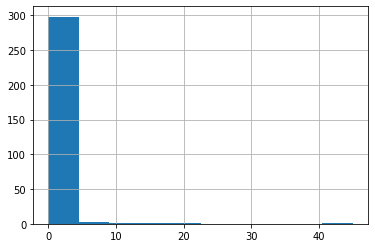

In [24]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count